# Missing Values

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Charger le dataset
file_path = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_filtered.csv"
df = pd.read_csv(file_path)

print(f"Dimensions initiales du dataset: {df.shape}")
print(f"Valeurs manquantes initiales:\n{df.isnull().sum()}\n")

# 1. Imputation par la m√©diane pour les colonnes sp√©cifi√©es
median_columns = [
    'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
    'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
    'koi_period_err1', 'koi_period_err2',
    'koi_duration_err1', 'koi_duration_err2',
    'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
    'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
    'koi_kepmag', 'koi_teq', 'koi_model_snr'
]

print("√âtape 1: Imputation par la m√©diane...")
for col in median_columns:
    if col in df.columns:
        median_value = df[col].median()
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            df[col].fillna(median_value, inplace=True)
            print(f"  - {col}: {missing_count} valeurs remplac√©es par {median_value:.2f}")

# 2. Suppression des lignes avec valeurs manquantes pour les colonnes d'impact et d'insolation
drop_rows_columns = [
    'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
    'koi_insol', 'koi_insol_err1', 'koi_insol_err2'
]

print(f"\n√âtape 2: Suppression des lignes avec valeurs manquantes...")
rows_before = len(df)
df.dropna(subset=drop_rows_columns, inplace=True)
rows_after = len(df)
print(f"  - {rows_before - rows_after} lignes supprim√©es")
print(f"  - Nouvelles dimensions: {df.shape}")

# 3. Suppression des colonnes koi_teq_err1 et koi_teq_err2
drop_columns = ['koi_teq_err1', 'koi_teq_err2']

print(f"\n√âtape 3: Suppression des colonnes...")
for col in drop_columns:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)
        print(f"  - Colonne {col} supprim√©e")

# 4. Imputation par KNN pour koi_srad et ses erreurs
knn_columns = ['koi_srad', 'koi_srad_err1', 'koi_srad_err2']

print(f"\n√âtape 4: Imputation par KNN (k=5) pour les colonnes de rayon stellaire...")

# V√©rifier s'il y a des valeurs manquantes dans ces colonnes
missing_in_knn = df[knn_columns].isnull().sum()
if missing_in_knn.sum() > 0:
    print(f"  - Valeurs manquantes avant KNN:")
    for col in knn_columns:
        if col in df.columns:
            print(f"    * {col}: {df[col].isnull().sum()}")
    
    # S√©lectionner les colonnes num√©riques pour KNN
    # On utilise les colonnes sans valeurs manquantes + les colonnes √† imputer
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Cr√©er l'imputer KNN
    imputer = KNNImputer(n_neighbors=5, weights='distance')
    
    # Appliquer KNN sur les colonnes num√©riques
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    
    print(f"  - Imputation KNN termin√©e")
    print(f"  - Valeurs manquantes apr√®s KNN:")
    for col in knn_columns:
        print(f"    * {col}: {df[col].isnull().sum()}")
else:
    print("  - Aucune valeur manquante d√©tect√©e dans les colonnes koi_srad")

# Sauvegarder le dataset nettoy√©
output_path = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_cleaned.csv"
df.to_csv(output_path, index=False)

print(f"\n{'='*60}")
print(f"R√âSUM√â FINAL")
print(f"{'='*60}")
print(f"Dimensions finales: {df.shape}")
print(f"Valeurs manquantes restantes: {df.isnull().sum().sum()}")
print(f"\nDataset nettoy√© sauvegard√© dans:\n{output_path}")

# Afficher un aper√ßu des premi√®res lignes
print(f"\n{'='*60}")
print("Aper√ßu du dataset nettoy√©:")
print(df.head())
print(f"\n{'='*60}")
print("Informations sur les colonnes:")
print(df.info())

Dimensions initiales du dataset: (9564, 35)
Valeurs manquantes initiales:
kepid                   0
kepoi_name              0
koi_disposition         0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_steff             363
koi_steff_err1        468
koi_steff_err2        483
koi_slogg             363
koi_slogg_err1        468
koi_slogg_err2        468
koi_srad              363
koi_srad_err1         468
koi_srad_err2         468
koi_kepmag              1
dtype: int64

√â

C:\Users\chaym\AppData\Local\Temp\ipykernel_10908\2464410324.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


  - Imputation KNN termin√©e
  - Valeurs manquantes apr√®s KNN:
    * koi_srad: 0
    * koi_srad_err1: 0
    * koi_srad_err2: 0

R√âSUM√â FINAL
Dimensions finales: (9110, 33)
Valeurs manquantes restantes: 0

Dataset nettoy√© sauvegard√© dans:
C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_cleaned.csv

Aper√ßu du dataset nettoy√©:
        kepid kepoi_name koi_disposition  koi_period  koi_period_err1  \
0  10797460.0  K00752.01       CONFIRMED    9.488036     2.775000e-05   
1  10797460.0  K00752.02       CONFIRMED   54.418383     2.479000e-04   
2  10811496.0  K00753.01       CANDIDATE   19.899140     1.494000e-05   
3  10848459.0  K00754.01  FALSE POSITIVE    1.736952     2.630000e-07   
4  10854555.0  K00755.01       CONFIRMED    2.525592     3.761000e-06   

   koi_period_err2  koi_impact  koi_impact_err1  koi_impact_err2  \
0    -2.775000e-05       0.146            0.318           -0.146   
1    -2.479000e-04       0.586            0.059           -0.443   
2    -1.494000e

ANALYSE DES OUTLIERS - DATASET KEPLER
Dimensions du dataset: (9110, 33)

Nombre de colonnes num√©riques analys√©es: 30

1. D√âTECTION DES OUTLIERS PAR M√âTHODE IQR

koi_period:
  - Q1: 2.6967, Q3: 37.1065, IQR: 34.4098
  - Limites: [-48.9179, 88.7212]
  - Outliers: 1489 (16.34%)
  - Min: 0.2418, Max: 129995.7784

koi_period_err1:
  - Q1: 0.0000, Q3: 0.0003, IQR: 0.0003
  - Limites: [-0.0004, 0.0007]
  - Outliers: 1650 (18.11%)
  - Min: 0.0000, Max: 0.1725

koi_period_err2:
  - Q1: -0.0003, Q3: -0.0000, IQR: 0.0003
  - Limites: [-0.0007, 0.0004]
  - Outliers: 1650 (18.11%)
  - Min: -0.1725, Max: 0.0000

koi_impact:
  - Q1: 0.1970, Q3: 0.8880, IQR: 0.6910
  - Limites: [-0.8395, 1.9245]
  - Outliers: 80 (0.88%)
  - Min: 0.0000, Max: 100.8060

koi_impact_err1:
  - Q1: 0.0400, Q3: 0.3780, IQR: 0.3380
  - Limites: [-0.4670, 0.8850]
  - Outliers: 736 (8.08%)
  - Min: 0.0000, Max: 85.5400

koi_impact_err2:
  - Q1: -0.4450, Q3: -0.0460, IQR: 0.3990
  - Limites: [-1.0435, 0.5525]
  - Outliers: 1

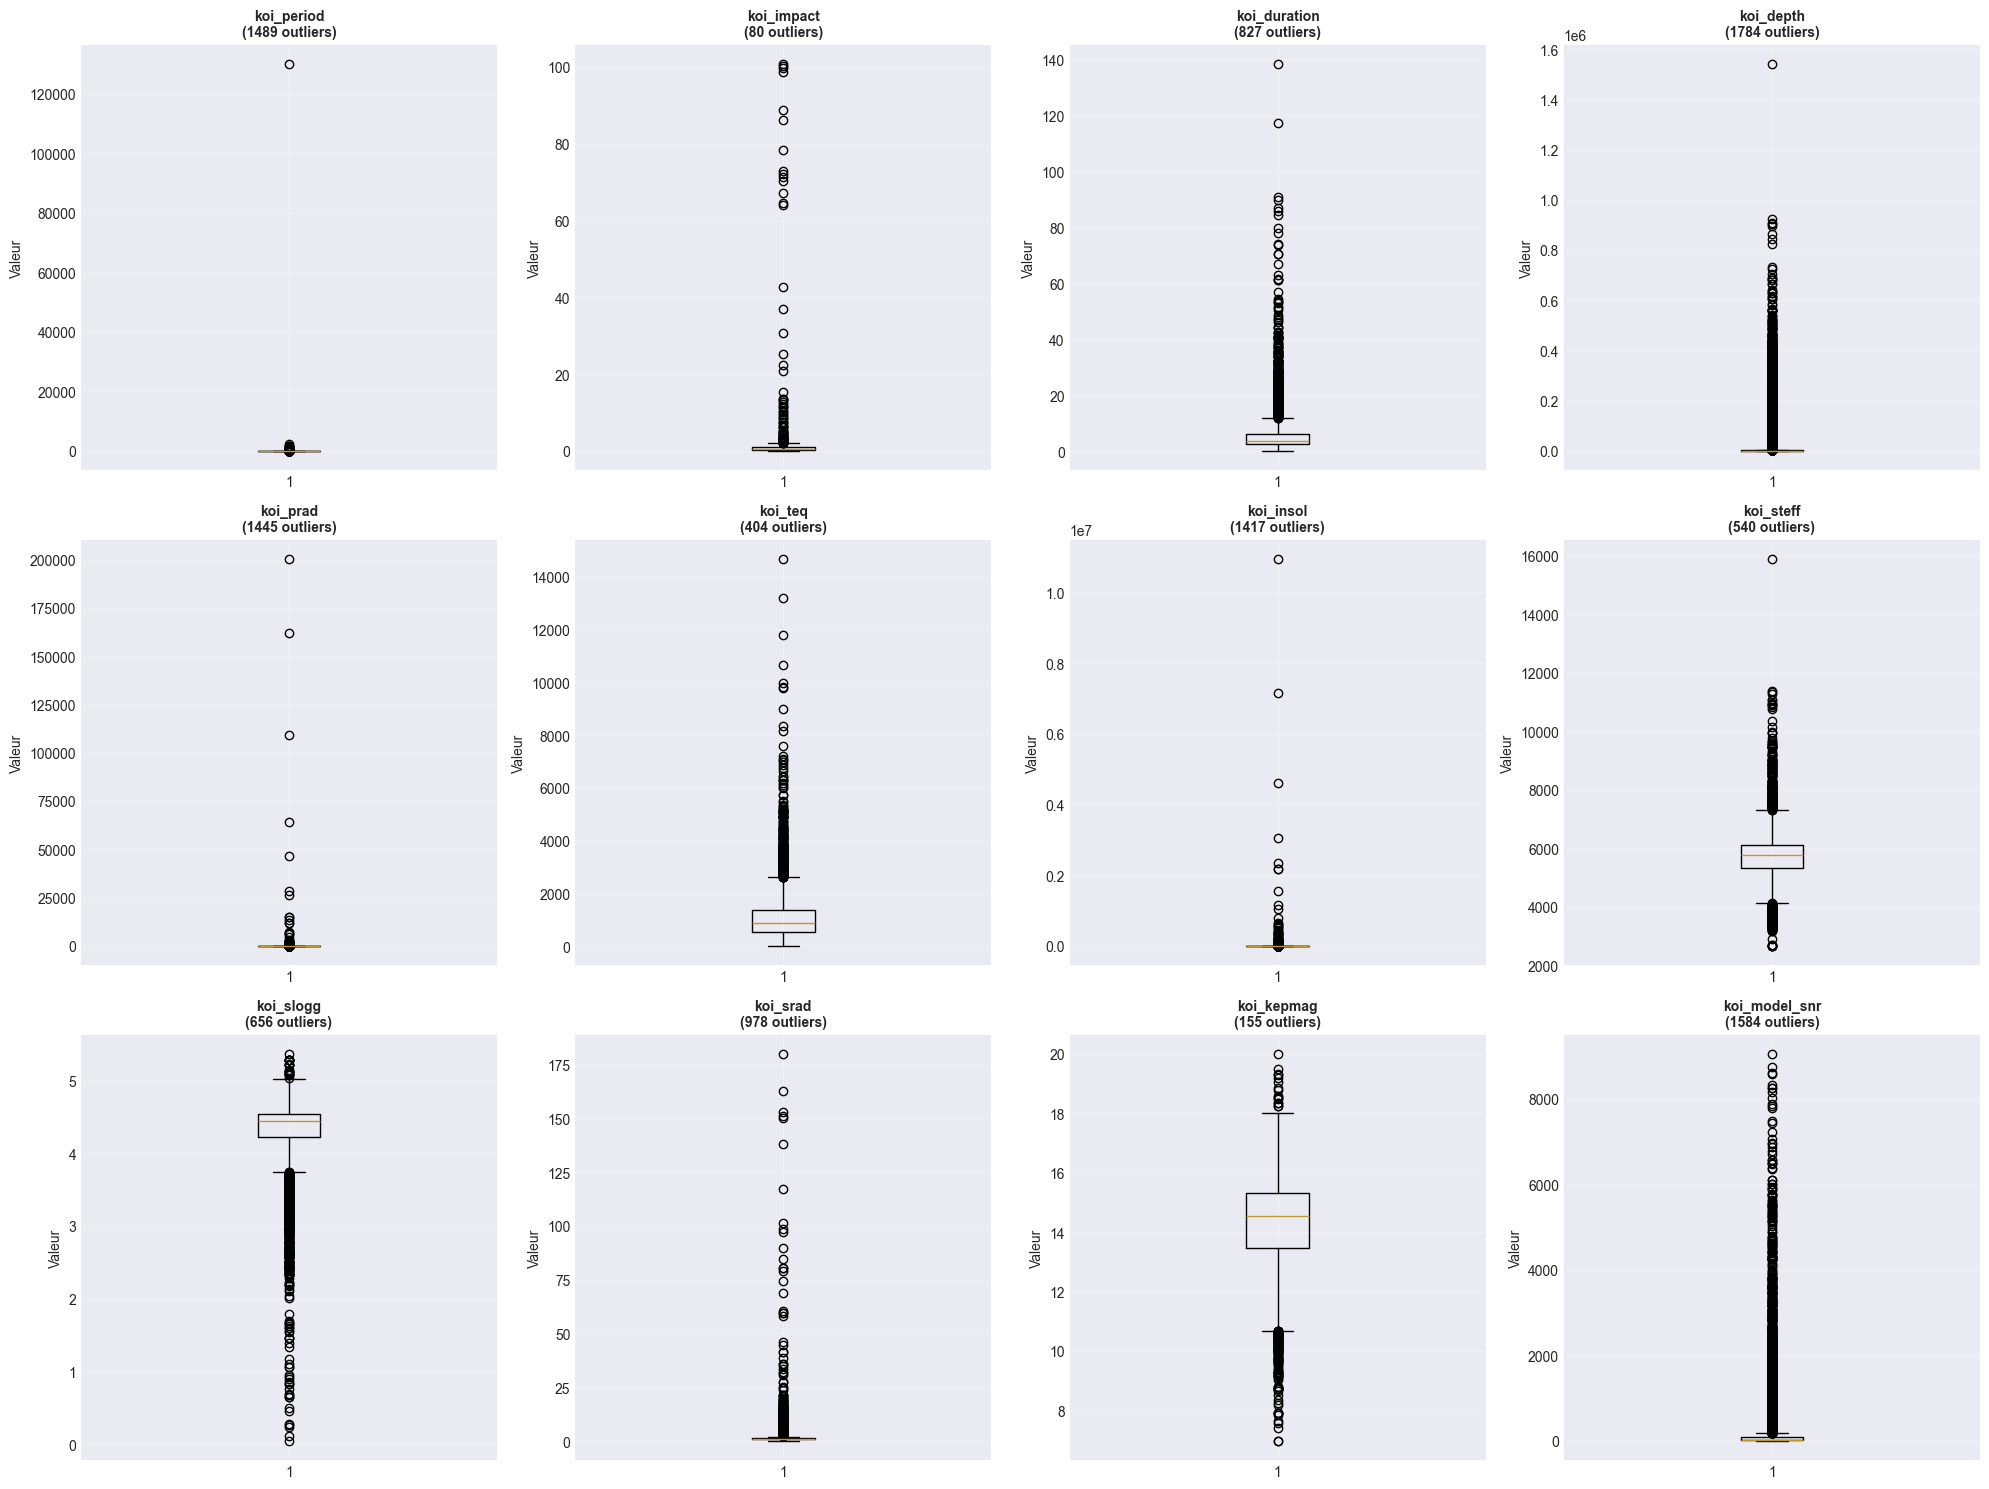

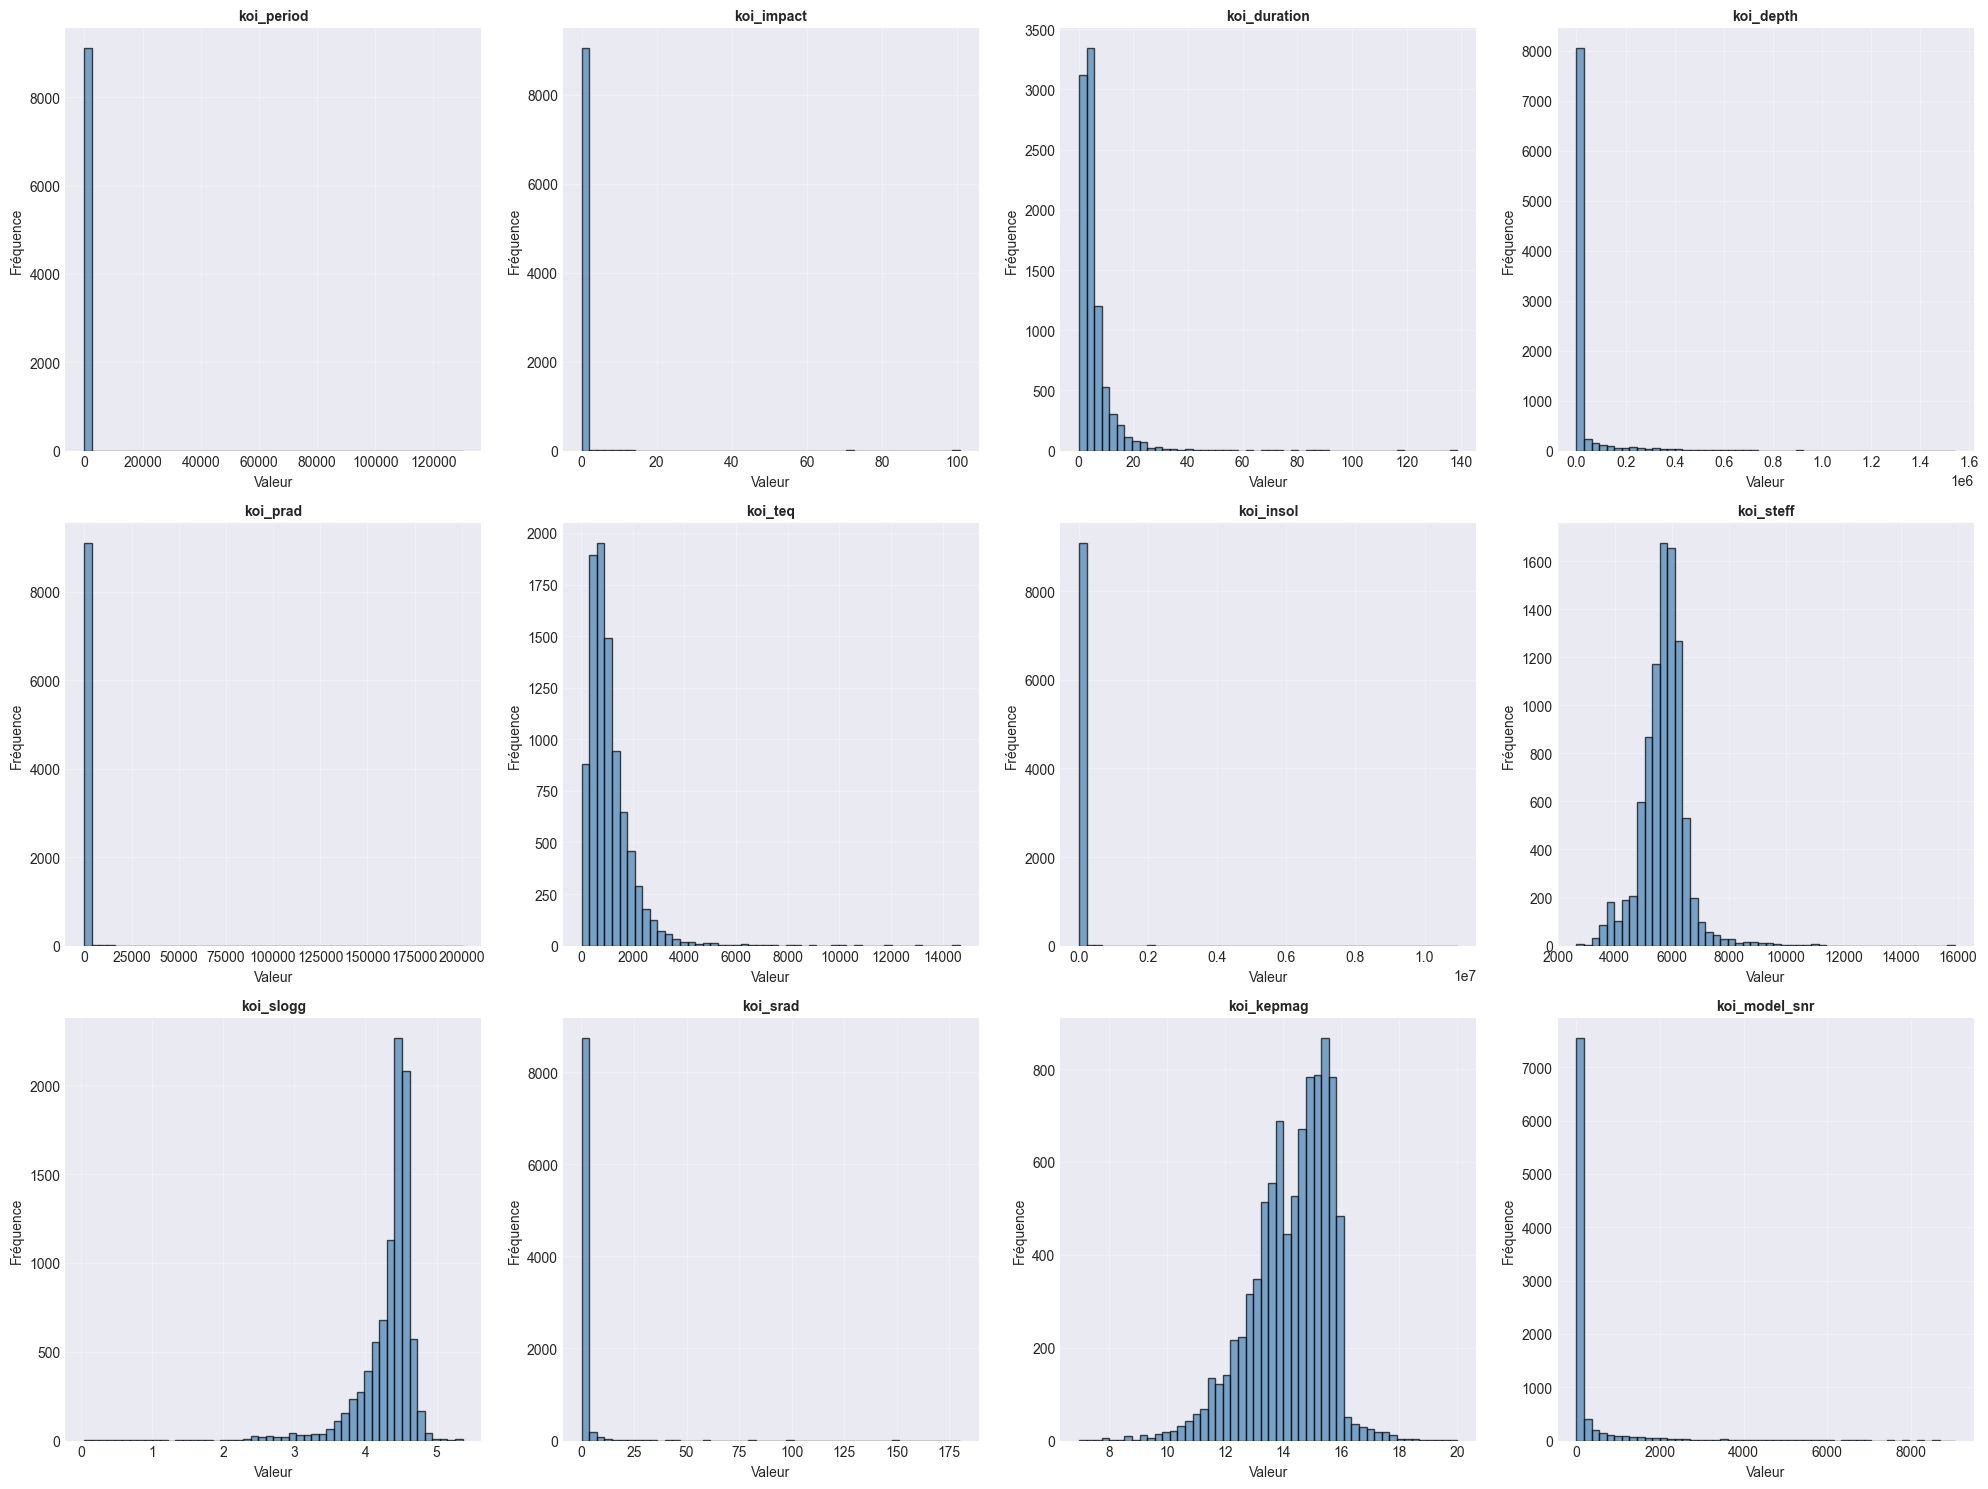

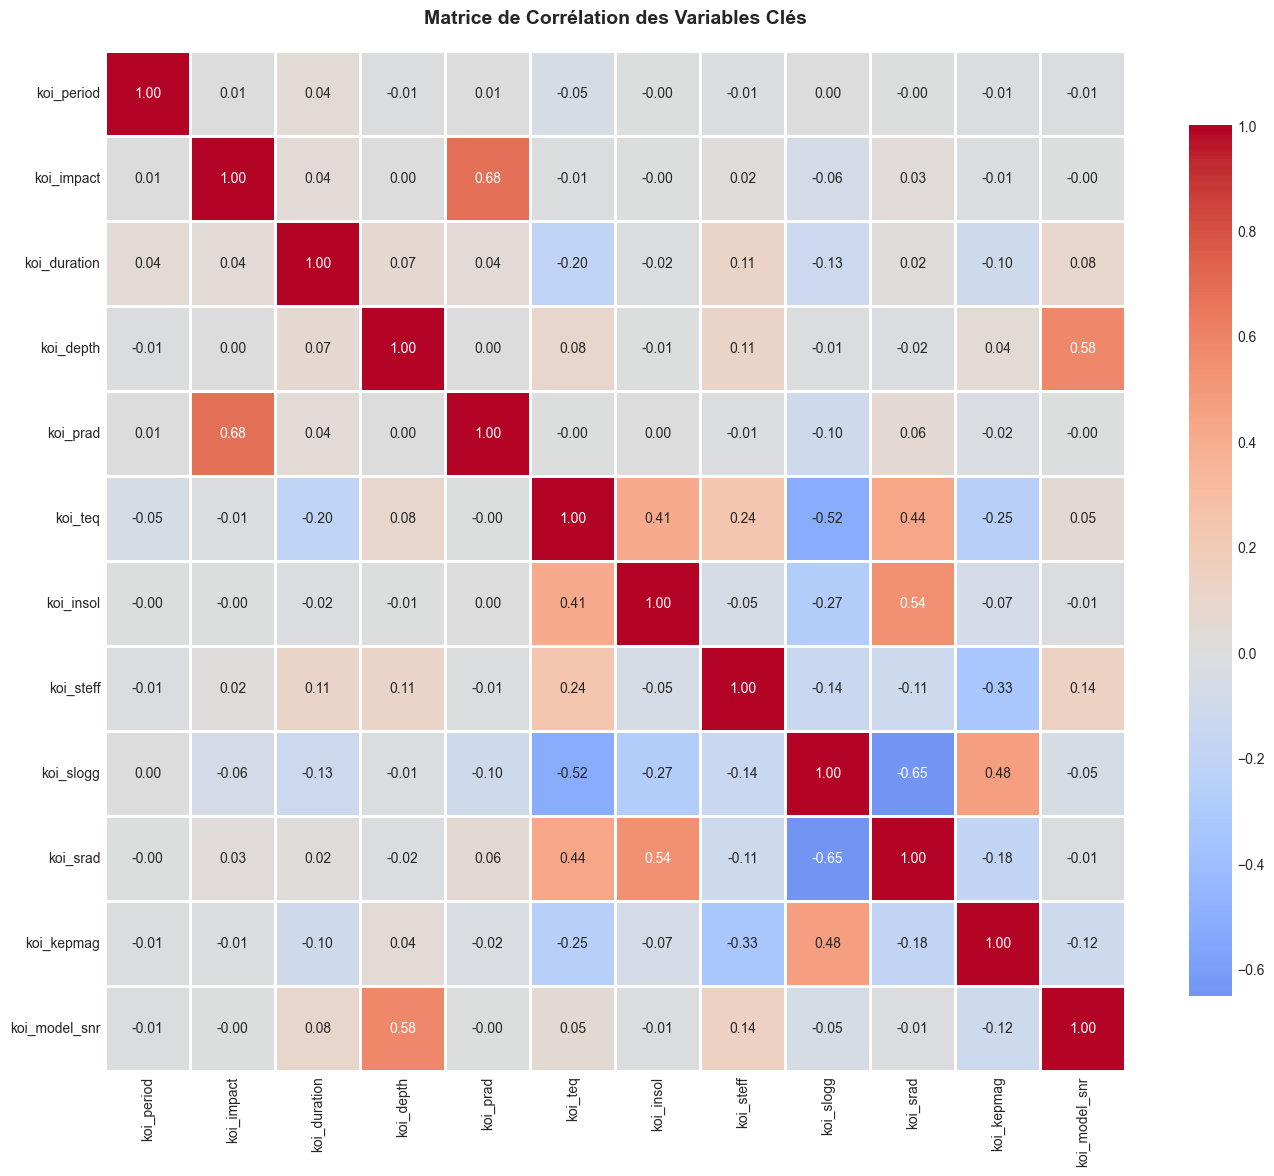

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Charger le dataset nettoy√©
file_path = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_cleaned.csv"
df = pd.read_csv(file_path)

print(f"{'='*70}")
print(f"ANALYSE DES OUTLIERS - DATASET KEPLER")
print(f"{'='*70}")
print(f"Dimensions du dataset: {df.shape}\n")

# S√©lectionner uniquement les colonnes num√©riques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Exclure les colonnes d'identifiant
exclude_cols = ['kepid']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

print(f"Nombre de colonnes num√©riques analys√©es: {len(numeric_cols)}\n")

# ==========================================
# 1. M√âTHODE IQR (Interquartile Range)
# ==========================================
print(f"{'='*70}")
print(f"1. D√âTECTION DES OUTLIERS PAR M√âTHODE IQR")
print(f"{'='*70}\n")

outliers_iqr = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_iqr[col] = len(outliers)
    
    if len(outliers) > 0:
        percentage = (len(outliers) / len(df)) * 100
        print(f"{col}:")
        print(f"  - Q1: {Q1:.4f}, Q3: {Q3:.4f}, IQR: {IQR:.4f}")
        print(f"  - Limites: [{lower_bound:.4f}, {upper_bound:.4f}]")
        print(f"  - Outliers: {len(outliers)} ({percentage:.2f}%)")
        print(f"  - Min: {df[col].min():.4f}, Max: {df[col].max():.4f}\n")

# ==========================================
# 2. M√âTHODE Z-SCORE
# ==========================================
print(f"\n{'='*70}")
print(f"2. D√âTECTION DES OUTLIERS PAR Z-SCORE (|Z| > 3)")
print(f"{'='*70}\n")

outliers_zscore = {}
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col], nan_policy='omit'))
    outliers = df[z_scores > 3]
    outliers_zscore[col] = len(outliers)
    
    if len(outliers) > 0:
        percentage = (len(outliers) / len(df)) * 100
        print(f"{col}:")
        print(f"  - Outliers: {len(outliers)} ({percentage:.2f}%)")
        print(f"  - Z-score max: {z_scores.max():.2f}\n")

# ==========================================
# 3. R√âSUM√â STATISTIQUE
# ==========================================
print(f"\n{'='*70}")
print(f"3. STATISTIQUES DESCRIPTIVES")
print(f"{'='*70}\n")

summary = df[numeric_cols].describe()
print(summary)

# ==========================================
# 4. VISUALISATIONS
# ==========================================
print(f"\n{'='*70}")
print(f"4. G√âN√âRATION DES VISUALISATIONS")
print(f"{'='*70}\n")

# S√©lectionner les colonnes les plus importantes pour la visualisation
key_columns = [
    'koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 
    'koi_prad', 'koi_teq', 'koi_insol', 'koi_steff', 
    'koi_slogg', 'koi_srad', 'koi_kepmag', 'koi_model_snr'
]

# Filtrer les colonnes qui existent dans le dataset
key_columns = [col for col in key_columns if col in numeric_cols]

# Cr√©er les boxplots
n_cols = 4
n_rows = int(np.ceil(len(key_columns) / n_cols))

fig1, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(key_columns):
    axes[idx].boxplot(df[col].dropna(), vert=True)
    axes[idx].set_title(f'{col}\n({outliers_iqr[col]} outliers)', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Valeur')
    axes[idx].grid(True, alpha=0.3)

# Masquer les axes vides
for idx in range(len(key_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/outliers_boxplots.png', dpi=300, bbox_inches='tight')
print("‚úì Boxplots sauvegard√©s: outliers_boxplots.png")

# Cr√©er les histogrammes avec distribution normale
fig2, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(key_columns):
    data = df[col].dropna()
    axes[idx].hist(data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Valeur')
    axes[idx].set_ylabel('Fr√©quence')
    axes[idx].grid(True, alpha=0.3)

# Masquer les axes vides
for idx in range(len(key_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/outliers_histograms.png', dpi=300, bbox_inches='tight')
print("‚úì Histogrammes sauvegard√©s: outliers_histograms.png")

# Cr√©er un heatmap des corr√©lations
fig3, ax = plt.subplots(figsize=(14, 12))
correlation_matrix = df[key_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
plt.title('Matrice de Corr√©lation des Variables Cl√©s', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/outliers_correlation.png', dpi=300, bbox_inches='tight')
print("‚úì Matrice de corr√©lation sauvegard√©e: outliers_correlation.png")

# ==========================================
# 5. RAPPORT R√âCAPITULATIF
# ==========================================
print(f"\n{'='*70}")
print(f"5. RAPPORT R√âCAPITULATIF DES OUTLIERS")
print(f"{'='*70}\n")

# Cr√©er un DataFrame r√©capitulatif
recap_data = []
for col in numeric_cols:
    recap_data.append({
        'Colonne': col,
        'Outliers IQR': outliers_iqr[col],
        'Outliers Z-Score': outliers_zscore[col],
        '% IQR': f"{(outliers_iqr[col]/len(df)*100):.2f}%",
        '% Z-Score': f"{(outliers_zscore[col]/len(df)*100):.2f}%"
    })

recap_df = pd.DataFrame(recap_data)
recap_df = recap_df.sort_values('Outliers IQR', ascending=False)

print(recap_df.to_string(index=False))

# Sauvegarder le rapport
recap_df.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/outliers_report.csv', index=False)
print(f"\n‚úì Rapport sauvegard√©: outliers_report.csv")

# Afficher les colonnes avec le plus d'outliers
print(f"\n{'='*70}")
print(f"TOP 10 DES COLONNES AVEC LE PLUS D'OUTLIERS (IQR)")
print(f"{'='*70}\n")
print(recap_df.head(10).to_string(index=False))

print(f"\n{'='*70}")
print(f"ANALYSE TERMIN√âE")
print(f"{'='*70}")
print(f"\nFichiers g√©n√©r√©s:")
print(f"  1. outliers_boxplots.png - Bo√Ætes √† moustaches")
print(f"  2. outliers_histograms.png - Distributions")
print(f"  3. outliers_correlation.png - Matrice de corr√©lation")
print(f"  4. outliers_report.csv - Rapport d√©taill√©")

TRAITEMENT DES OUTLIERS - DATASET KEPLER
Dimensions initiales: (9110, 33)

STRAT√âGIE DE TRAITEMENT

CAP_IQR:
  Description: Winsorisation (IQR) - Limiter aux limites IQR
  Colonnes concern√©es: 10
  koi_period, koi_duration, koi_depth, koi_prad, koi_teq...

CAP_PERCENTILE:
  Description: Winsorisation (Percentiles) - Limiter √† 1er et 99e percentile
  Colonnes concern√©es: 10
  koi_period_err1, koi_period_err2, koi_duration_err1, koi_duration_err2, koi_depth_err1...

LOG_TRANSFORM:
  Description: Transformation logarithmique - Pour distributions tr√®s asym√©triques
  Colonnes concern√©es: 0
  

KEEP_EXTREME:
  Description: Garder les valeurs - Variables physiquement justifi√©es
  Colonnes concern√©es: 10
  koi_impact, koi_impact_err1, koi_impact_err2, koi_slogg, koi_slogg_err1...


M√âTHODE 1: WINSORISATION PAR IQR (Capping)

koi_period: 1489 valeurs limit√©es √† [-48.9179, 88.7212]
koi_duration: 827 valeurs limit√©es √† [-3.2911, 12.0332]
koi_depth: 1784 valeurs limit√©es √† [-1833.2

C:\Users\chaym\AppData\Local\Temp\ipykernel_10908\3572658468.py:234: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([df_original[col].dropna(), df[col].dropna()],
C:\Users\chaym\AppData\Local\Temp\ipykernel_10908\3572658468.py:234: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([df_original[col].dropna(), df[col].dropna()],
C:\Users\chaym\AppData\Local\Temp\ipykernel_10908\3572658468.py:234: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([df_original[col].dropna(), df[col].dropna()],
C:\Users\chaym\AppData\Local\Temp\ipykernel_10908\3572658468.py:234: MatplotlibDeprec

‚úì Comparaison avant/apr√®s sauvegard√©e: outliers_treatment_comparison.png
‚úì Distributions log-transform√©es sauvegard√©es: outliers_log_distributions.png

SAUVEGARDE DES DATASETS TRAIT√âS

‚úì Dataset avec winsorisation: Kepler_winsorized.csv
  Dimensions: (9110, 36)
‚úì Dataset sans outliers extr√™mes: Kepler_no_extreme.csv
  Dimensions: (9110, 36)
TRAITEMENT TERMIN√â


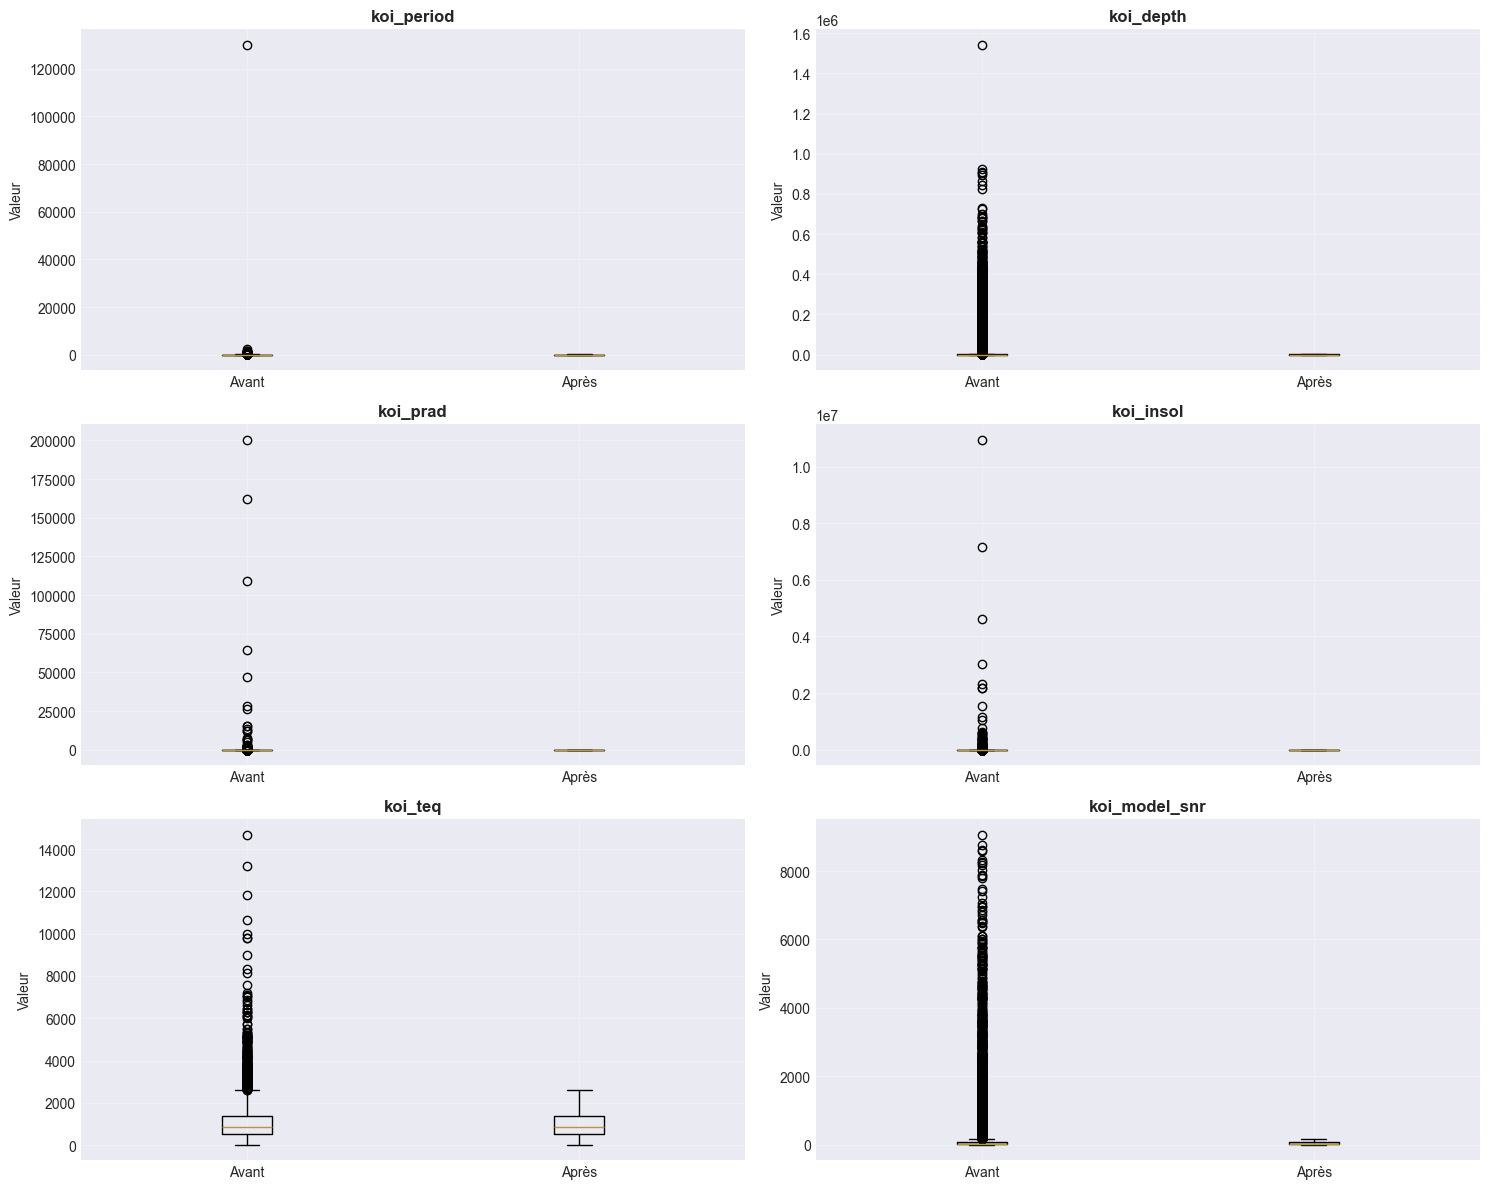

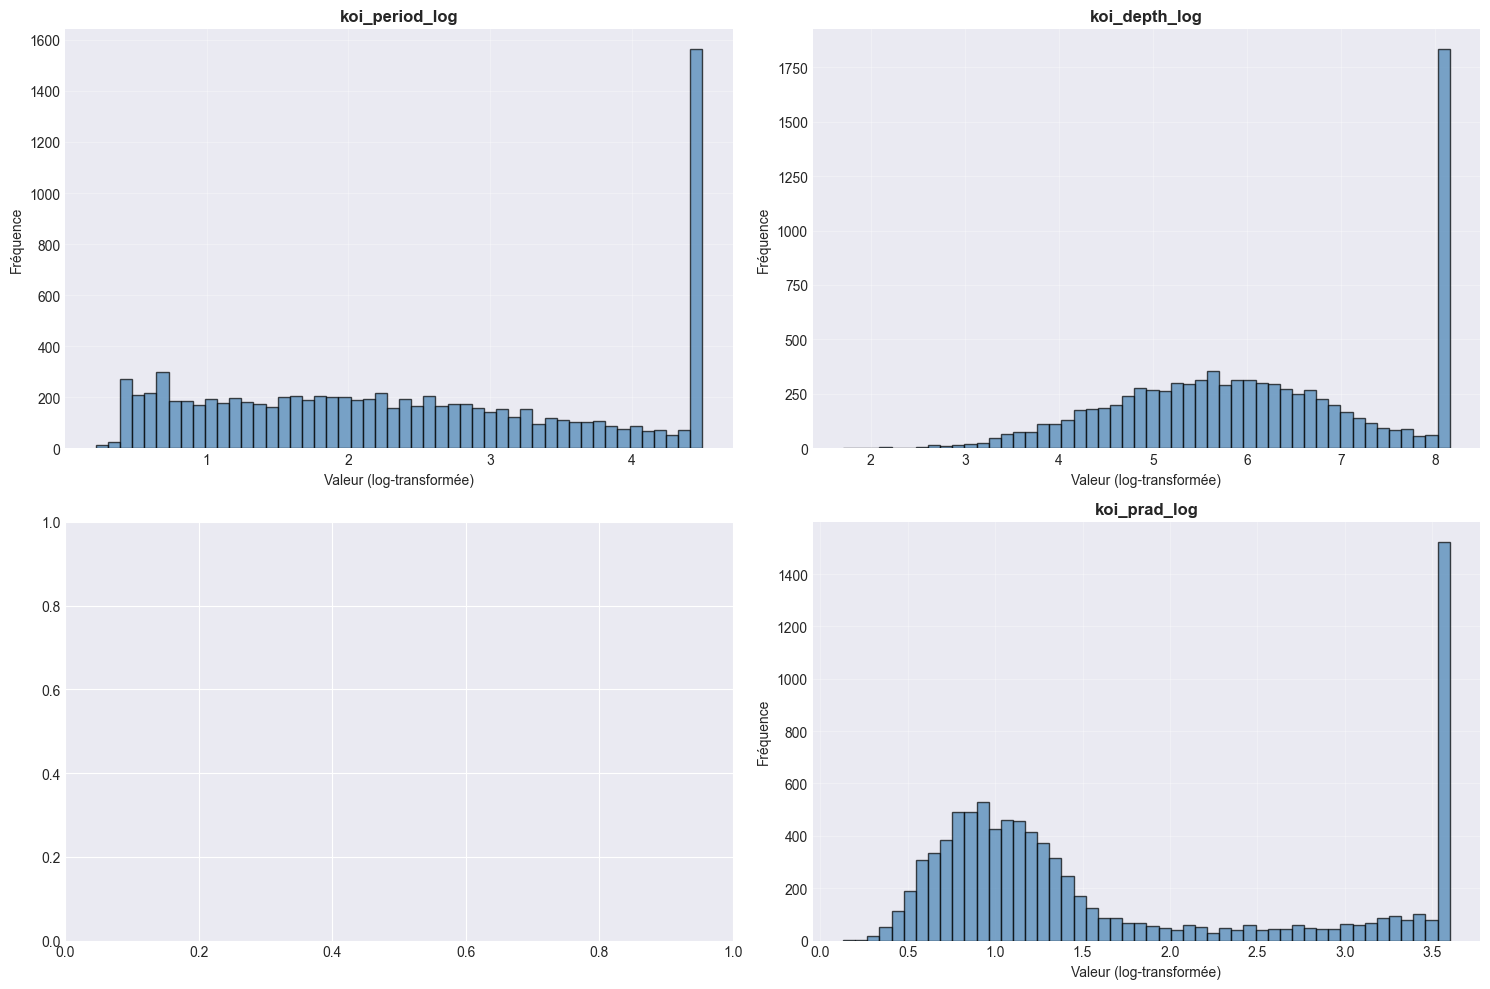

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
file_path = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_cleaned.csv"
df = pd.read_csv(file_path)

print(f"{'='*80}")
print(f"TRAITEMENT DES OUTLIERS - DATASET KEPLER")
print(f"{'='*80}")
print(f"Dimensions initiales: {df.shape}\n")

# Cr√©er une copie pour comparaison
df_original = df.copy()

# ================================================================================
# STRAT√âGIE DE TRAITEMENT DES OUTLIERS
# ================================================================================

print(f"{'='*80}")
print(f"STRAT√âGIE DE TRAITEMENT")
print(f"{'='*80}\n")

# D√©finir les colonnes par cat√©gorie et m√©thode de traitement
treatment_strategy = {
    'cap_iqr': {
        'description': 'Winsorisation (IQR) - Limiter aux limites IQR',
        'columns': [
            'koi_period', 'koi_duration', 'koi_depth', 
            'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr',
            'koi_steff', 'koi_srad', 'koi_kepmag'
        ]
    },
    'cap_percentile': {
        'description': 'Winsorisation (Percentiles) - Limiter √† 1er et 99e percentile',
        'columns': [
            'koi_period_err1', 'koi_period_err2',
            'koi_duration_err1', 'koi_duration_err2',
            'koi_depth_err1', 'koi_depth_err2',
            'koi_prad_err1', 'koi_prad_err2',
            'koi_insol_err1', 'koi_insol_err2'
        ]
    },
    'log_transform': {
        'description': 'Transformation logarithmique - Pour distributions tr√®s asym√©triques',
        'columns': []  # Appliqu√© apr√®s analyse
    },
    'keep_extreme': {
        'description': 'Garder les valeurs - Variables physiquement justifi√©es',
        'columns': [
            'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
            'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
            'koi_steff_err1', 'koi_steff_err2',
            'koi_srad_err1', 'koi_srad_err2'
        ]
    }
}

for method, info in treatment_strategy.items():
    print(f"{method.upper()}:")
    print(f"  Description: {info['description']}")
    print(f"  Colonnes concern√©es: {len(info['columns'])}")
    print(f"  {', '.join(info['columns'][:5])}{'...' if len(info['columns']) > 5 else ''}\n")

# ================================================================================
# M√âTHODE 1: WINSORISATION PAR IQR
# ================================================================================

print(f"\n{'='*80}")
print(f"M√âTHODE 1: WINSORISATION PAR IQR (Capping)")
print(f"{'='*80}\n")

outliers_capped_iqr = {}
for col in treatment_strategy['cap_iqr']['columns']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Compter les outliers avant traitement
        outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        
        # Appliquer le capping
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        
        outliers_capped_iqr[col] = outliers_before
        if outliers_before > 0:
            print(f"{col}: {outliers_before} valeurs limit√©es √† [{lower_bound:.4f}, {upper_bound:.4f}]")

# ================================================================================
# M√âTHODE 2: WINSORISATION PAR PERCENTILES (1%-99%)
# ================================================================================

print(f"\n{'='*80}")
print(f"M√âTHODE 2: WINSORISATION PAR PERCENTILES (1%-99%)")
print(f"{'='*80}\n")

outliers_capped_pct = {}
for col in treatment_strategy['cap_percentile']['columns']:
    if col in df.columns:
        p1 = df[col].quantile(0.01)
        p99 = df[col].quantile(0.99)
        
        # Compter les outliers avant traitement
        outliers_before = ((df[col] < p1) | (df[col] > p99)).sum()
        
        # Appliquer le capping
        df[col] = df[col].clip(lower=p1, upper=p99)
        
        outliers_capped_pct[col] = outliers_before
        if outliers_before > 0:
            print(f"{col}: {outliers_before} valeurs limit√©es √† [{p1:.6f}, {p99:.6f}]")

# ================================================================================
# M√âTHODE 3: TRANSFORMATION LOGARITHMIQUE (pour colonnes tr√®s asym√©triques)
# ================================================================================

print(f"\n{'='*80}")
print(f"M√âTHODE 3: TRANSFORMATION LOGARITHMIQUE")
print(f"{'='*80}\n")

# Identifier les colonnes avec forte asym√©trie (skewness > 3)
log_transform_candidates = []
for col in df.select_dtypes(include=[np.number]).columns:
    if col not in ['kepid'] and df[col].min() > 0:  # Uniquement valeurs positives
        skewness = df[col].skew()
        if abs(skewness) > 3:
            log_transform_candidates.append((col, skewness))

log_transform_candidates.sort(key=lambda x: abs(x[1]), reverse=True)

print("Colonnes avec forte asym√©trie (|skewness| > 3):")
for col, skew in log_transform_candidates[:10]:
    print(f"  {col}: skewness = {skew:.2f}")

# Cr√©er de nouvelles colonnes log-transform√©es pour les principales variables
log_columns = ['koi_period', 'koi_depth', 'koi_insol', 'koi_prad']
print(f"\nCr√©ation de colonnes log-transform√©es:")
for col in log_columns:
    if col in df.columns and df[col].min() > 0:
        df[f'{col}_log'] = np.log1p(df[col])  # log1p pour √©viter log(0)
        print(f"  ‚úì {col}_log cr√©√©e (log1p transformation)")

# ================================================================================
# M√âTHODE 4: ANALYSE DES VALEURS EXTR√äMES √Ä CONSERVER
# ================================================================================

print(f"\n{'='*80}")
print(f"M√âTHODE 4: VALEURS EXTR√äMES CONSERV√âES")
print(f"{'='*80}\n")

print("Les colonnes suivantes conservent leurs valeurs extr√™mes car:")
print("- Elles repr√©sentent des incertitudes de mesure (erreurs)")
print("- Les valeurs extr√™mes peuvent √™tre physiquement justifi√©es")
print("- Elles seront standardis√©es lors de la mod√©lisation\n")

for col in treatment_strategy['keep_extreme']['columns'][:5]:
    if col in df.columns:
        print(f"  {col}: Min={df[col].min():.4f}, Max={df[col].max():.4f}")

# ================================================================================
# OPTION ALTERNATIVE: SUPPRESSION DES OUTLIERS EXTR√äMES
# ================================================================================

print(f"\n{'='*80}")
print(f"OPTION ALTERNATIVE: SUPPRESSION DES OUTLIERS EXTR√äMES (Z-SCORE)")
print(f"{'='*80}\n")

# Cr√©er une version avec suppression des outliers extr√™mes (|Z| > 4)
df_no_extreme = df.copy()

key_columns = ['koi_period', 'koi_depth', 'koi_prad', 'koi_insol']
rows_before = len(df_no_extreme)

for col in key_columns:
    if col in df_no_extreme.columns:
        z_scores = np.abs(stats.zscore(df_no_extreme[col]))
        df_no_extreme = df_no_extreme[z_scores < 4]

rows_after = len(df_no_extreme)
print(f"Suppression des outliers extr√™mes (|Z| > 4):")
print(f"  - Lignes supprim√©es: {rows_before - rows_after}")
print(f"  - Lignes restantes: {rows_after} ({(rows_after/rows_before)*100:.2f}%)")

# ================================================================================
# COMPARAISON AVANT/APR√àS
# ================================================================================

print(f"\n{'='*80}")
print(f"COMPARAISON STATISTIQUES AVANT/APR√àS TRAITEMENT")
print(f"{'='*80}\n")

comparison_cols = ['koi_period', 'koi_depth', 'koi_prad', 'koi_insol', 'koi_teq']
comparison_data = []

for col in comparison_cols:
    if col in df.columns:
        comparison_data.append({
            'Colonne': col,
            'Min Avant': f"{df_original[col].min():.2f}",
            'Min Apr√®s': f"{df[col].min():.2f}",
            'Max Avant': f"{df_original[col].max():.2f}",
            'Max Apr√®s': f"{df[col].max():.2f}",
            'M√©diane Avant': f"{df_original[col].median():.2f}",
            'M√©diane Apr√®s': f"{df[col].median():.2f}"
        })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# ================================================================================
# VISUALISATIONS
# ================================================================================

print(f"\n{'='*80}")
print(f"G√âN√âRATION DES VISUALISATIONS")
print(f"{'='*80}\n")

# Comparaison avant/apr√®s pour les colonnes cl√©s
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

comparison_visual_cols = ['koi_period', 'koi_depth', 'koi_prad', 'koi_insol', 'koi_teq', 'koi_model_snr']

for idx, col in enumerate(comparison_visual_cols):
    if col in df.columns:
        axes[idx].boxplot([df_original[col].dropna(), df[col].dropna()], 
                         labels=['Avant', 'Apr√®s'])
        axes[idx].set_title(f'{col}', fontweight='bold')
        axes[idx].set_ylabel('Valeur')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/outliers_treatment_comparison.png', 
            dpi=300, bbox_inches='tight')
print("‚úì Comparaison avant/apr√®s sauvegard√©e: outliers_treatment_comparison.png")

# Distribution des colonnes log-transform√©es
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 10))
axes2 = axes2.flatten()

for idx, col in enumerate(log_columns):
    log_col = f'{col}_log'
    if log_col in df.columns:
        axes2[idx].hist(df[log_col].dropna(), bins=50, alpha=0.7, color='steelblue', edgecolor='black')
        axes2[idx].set_title(f'{log_col}', fontweight='bold')
        axes2[idx].set_xlabel('Valeur (log-transform√©e)')
        axes2[idx].set_ylabel('Fr√©quence')
        axes2[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/outliers_log_distributions.png', 
            dpi=300, bbox_inches='tight')
print("‚úì Distributions log-transform√©es sauvegard√©es: outliers_log_distributions.png")

# ================================================================================
# SAUVEGARDER LES DATASETS
# ================================================================================

print(f"\n{'='*80}")
print(f"SAUVEGARDE DES DATASETS TRAIT√âS")
print(f"{'='*80}\n")

# Dataset avec winsorisation
output_path1 = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_winsorized.csv"
df.to_csv(output_path1, index=False)
print(f"‚úì Dataset avec winsorisation: Kepler_winsorized.csv")
print(f"  Dimensions: {df.shape}")

# Dataset avec suppression des extr√™mes
output_path2 = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_no_extreme.csv"
df_no_extreme.to_csv(output_path2, index=False)
print(f"‚úì Dataset sans outliers extr√™mes: Kepler_no_extreme.csv")
print(f"  Dimensions: {df_no_extreme.shape}")


print(f"{'='*80}")
print(f"TRAITEMENT TERMIN√â")
print(f"{'='*80}")

√âTAPE 1 - ANALYSE DE LA VARIABLE CIBLE (koi_disposition)

Dimensions du dataset: (9110, 36)
Colonnes: 36
Observations: 9110

1. DISTRIBUTION DES CLASSES

Nombre d'observations par classe:
koi_disposition
FALSE POSITIVE    4506
CONFIRMED         2741
CANDIDATE         1863
Name: count, dtype: int64

Pourcentages par classe:
  FALSE POSITIVE: 49.46%
  CONFIRMED: 30.09%
  CANDIDATE: 20.45%

2. ANALYSE DU D√âS√âQUILIBRE DES CLASSES

Ratio de d√©s√©quilibre: 2.42
Classe majoritaire: FALSE POSITIVE (4506 obs)
Classe minoritaire: CANDIDATE (1863 obs)

‚ö†Ô∏è  L√©ger d√©s√©quilibre - Techniques de base suffisantes

3. VISUALISATIONS

‚úì Graphiques sauvegard√©s: step1_target_analysis.png

4. STATISTIQUES SUPPL√âMENTAIRES

Valeurs manquantes dans koi_disposition: 0
‚úì Toutes les observations ont un label

Nombre de classes uniques: 3
Classes: ['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE']

5. RECOMMANDATIONS POUR LA MOD√âLISATION

üí° Recommandations:
  ‚Üí Utiliser stratify=y lors du train_te

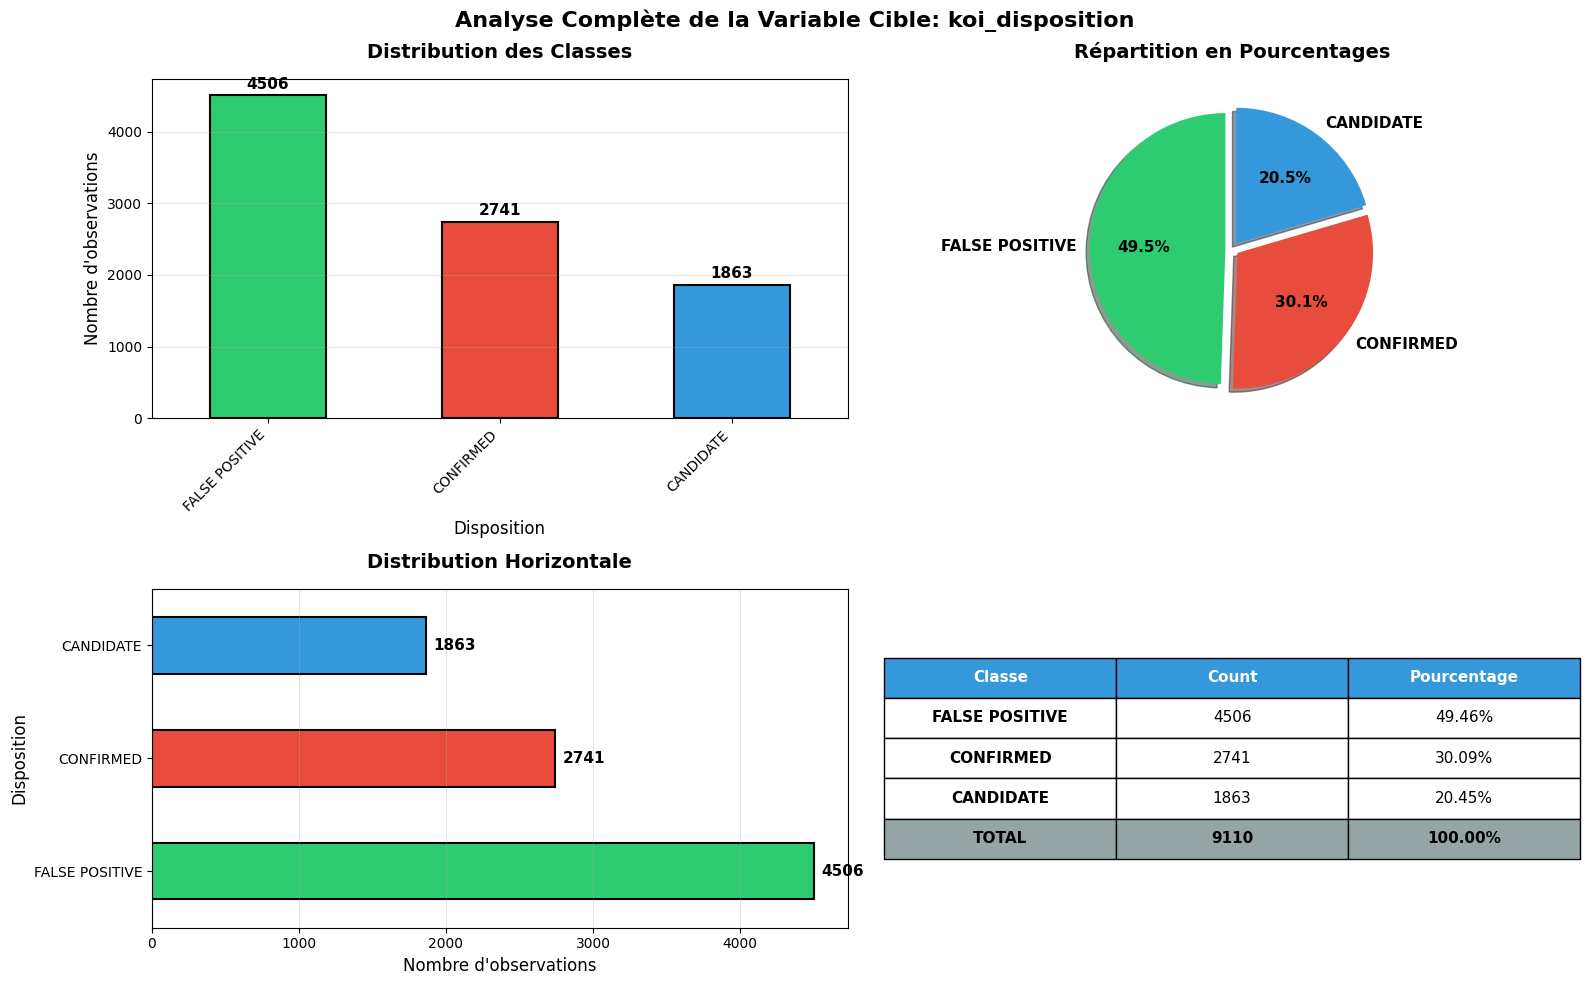

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
file_path = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_winsorized.csv"
df = pd.read_csv(file_path)

print(f"{'='*80}")
print(f"√âTAPE 1 - ANALYSE DE LA VARIABLE CIBLE (koi_disposition)")
print(f"{'='*80}\n")

print(f"Dimensions du dataset: {df.shape}")
print(f"Colonnes: {df.shape[1]}")
print(f"Observations: {df.shape[0]}\n")

# ================================================================================
# 1. DISTRIBUTION DES CLASSES
# ================================================================================

print(f"{'='*80}")
print(f"1. DISTRIBUTION DES CLASSES")
print(f"{'='*80}\n")

# Comptage des classes
class_counts = df['koi_disposition'].value_counts()
print("Nombre d'observations par classe:")
print(class_counts)
print()

# Pourcentages
class_percentages = df['koi_disposition'].value_counts(normalize=True) * 100
print("Pourcentages par classe:")
for classe, pourcentage in class_percentages.items():
    print(f"  {classe}: {pourcentage:.2f}%")

# ================================================================================
# 2. CALCUL DU D√âS√âQUILIBRE
# ================================================================================

print(f"\n{'='*80}")
print(f"2. ANALYSE DU D√âS√âQUILIBRE DES CLASSES")
print(f"{'='*80}\n")

# Ratio de d√©s√©quilibre (classe majoritaire / classe minoritaire)
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Ratio de d√©s√©quilibre: {imbalance_ratio:.2f}")
print(f"Classe majoritaire: {class_counts.idxmax()} ({class_counts.max()} obs)")
print(f"Classe minoritaire: {class_counts.idxmin()} ({class_counts.min()} obs)")

# √âvaluation du niveau de d√©s√©quilibre
if imbalance_ratio < 1.5:
    print("\n‚úì Dataset bien √©quilibr√©")
elif imbalance_ratio < 3:
    print("\n‚ö†Ô∏è  L√©ger d√©s√©quilibre - Techniques de base suffisantes")
elif imbalance_ratio < 10:
    print("\n‚ö†Ô∏è  D√©s√©quilibre mod√©r√© - Utiliser class_weight ou SMOTE")
else:
    print("\n‚ùå D√©s√©quilibre s√©v√®re - Techniques avanc√©es n√©cessaires")

# ================================================================================
# 3. VISUALISATIONS
# ================================================================================

print(f"\n{'='*80}")
print(f"3. VISUALISATIONS")
print(f"{'='*80}\n")

# Cr√©er une figure avec plusieurs graphiques
fig = plt.figure(figsize=(16, 10))

# 3.1 Graphique en barres
ax1 = plt.subplot(2, 2, 1)
colors = ['#2ecc71', '#e74c3c', '#3498db']
class_counts.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.5)
plt.title('Distribution des Classes', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Disposition', fontsize=12)
plt.ylabel('Nombre d\'observations', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold', fontsize=11)

# 3.2 Graphique en camembert
ax2 = plt.subplot(2, 2, 2)
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'},
        explode=(0.05, 0.05, 0.05), shadow=True)
plt.title('R√©partition en Pourcentages', fontsize=14, fontweight='bold', pad=15)

# 3.3 Graphique horizontal pour mieux voir les noms
ax3 = plt.subplot(2, 2, 3)
class_counts.plot(kind='barh', color=colors, edgecolor='black', linewidth=1.5)
plt.title('Distribution Horizontale', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Nombre d\'observations', fontsize=12)
plt.ylabel('Disposition', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')

# Ajouter les valeurs sur les barres
for i, v in enumerate(class_counts.values):
    plt.text(v + 50, i, str(v), ha='left', va='center', fontweight='bold', fontsize=11)

# 3.4 Tableau r√©capitulatif
ax4 = plt.subplot(2, 2, 4)
ax4.axis('tight')
ax4.axis('off')

# Cr√©er les donn√©es du tableau
table_data = []
for classe in class_counts.index:
    count = class_counts[classe]
    percentage = class_percentages[classe]
    table_data.append([classe, count, f"{percentage:.2f}%"])

# Ajouter une ligne totale
table_data.append(['TOTAL', class_counts.sum(), '100.00%'])

# Cr√©er le tableau
table = ax4.table(cellText=table_data,
                  colLabels=['Classe', 'Count', 'Pourcentage'],
                  cellLoc='center',
                  loc='center',
                  colColours=['#f0f0f0']*3)

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Style du tableau
for i in range(len(table_data) + 1):
    for j in range(3):
        cell = table[(i, j)]
        if i == 0:  # Header
            cell.set_facecolor('#3498db')
            cell.set_text_props(weight='bold', color='white')
        elif i == len(table_data):  # Derni√®re ligne (TOTAL)
            cell.set_facecolor('#95a5a6')
            cell.set_text_props(weight='bold')
        else:
            if j == 0:  # Premi√®re colonne
                cell.set_text_props(weight='bold')

plt.suptitle('Analyse Compl√®te de la Variable Cible: koi_disposition', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step1_target_analysis.png', 
            dpi=300, bbox_inches='tight')

print("‚úì Graphiques sauvegard√©s: step1_target_analysis.png")

# ================================================================================
# 4. STATISTIQUES SUPPL√âMENTAIRES
# ================================================================================

print(f"\n{'='*80}")
print(f"4. STATISTIQUES SUPPL√âMENTAIRES")
print(f"{'='*80}\n")

# V√©rifier les valeurs manquantes dans la cible
missing_target = df['koi_disposition'].isnull().sum()
print(f"Valeurs manquantes dans koi_disposition: {missing_target}")

if missing_target > 0:
    print(f"‚ö†Ô∏è  Attention: {missing_target} observations sans label")
else:
    print("‚úì Toutes les observations ont un label")

# Valeurs uniques
print(f"\nNombre de classes uniques: {df['koi_disposition'].nunique()}")
print(f"Classes: {df['koi_disposition'].unique().tolist()}")

# ================================================================================
# 5. RECOMMANDATIONS
# ================================================================================

print(f"\n{'='*80}")
print(f"5. RECOMMANDATIONS POUR LA MOD√âLISATION")
print(f"{'='*80}\n")

if imbalance_ratio < 1.5:
    print("‚úì Pas de traitement sp√©cial n√©cessaire")
    print("  ‚Üí Utiliser les algorithmes standards")
elif imbalance_ratio < 3:
    print("üí° Recommandations:")
    print("  ‚Üí Utiliser stratify=y lors du train_test_split")
    print("  ‚Üí Consid√©rer class_weight='balanced' dans les mod√®les")
elif imbalance_ratio < 10:
    print("üí° Recommandations:")
    print("  ‚Üí Utiliser class_weight='balanced' obligatoirement")
    print("  ‚Üí Consid√©rer SMOTE pour r√©√©quilibrage")
    print("  ‚Üí Utiliser des m√©triques adapt√©es (F1-score, ROC-AUC)")
else:
    print("üí° Recommandations:")
    print("  ‚Üí Appliquer SMOTE ou ADASYN")
    print("  ‚Üí Utiliser des algorithmes robustes au d√©s√©quilibre")
    print("  ‚Üí Focus sur les m√©triques: Recall, Precision, F1-score")
    print("  ‚Üí √âviter l'accuracy comme m√©trique principale")

# ================================================================================
# 6. EXPORT DES STATISTIQUES
# ================================================================================

print(f"\n{'='*80}")
print(f"6. EXPORT DES STATISTIQUES")
print(f"{'='*80}\n")

# Cr√©er un DataFrame r√©capitulatif
summary_df = pd.DataFrame({
    'Classe': class_counts.index,
    'Count': class_counts.values,
    'Pourcentage': class_percentages.values,
    'Ratio': [class_counts[c] / class_counts.min() for c in class_counts.index]
})

summary_df.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step1_target_summary.csv', 
                  index=False)
print("‚úì R√©sum√© sauvegard√©: step1_target_summary.csv")

print(f"\n{'='*80}")
print(f"√âTAPE 1 TERMIN√âE ‚úì")
print(f"{'='*80}")
print("\nFichiers g√©n√©r√©s:")
print("  1. step1_target_analysis.png - Visualisations compl√®tes")
print("  2. step1_target_summary.csv - Tableau r√©capitulatif")
print("\n‚û°Ô∏è  Passer √† l'√âtape 2: S√©lection des features")

√âTAPE 2 - S√âLECTION DES FEATURES

Dimensions du dataset: (9110, 36)

1. IDENTIFICATION DES COLONNES

Toutes les colonnes du dataset:
   1. kepid
   2. kepoi_name
   3. koi_disposition
   4. koi_period
   5. koi_period_err1
   6. koi_period_err2
   7. koi_impact
   8. koi_impact_err1
   9. koi_impact_err2
  10. koi_duration
  11. koi_duration_err1
  12. koi_duration_err2
  13. koi_depth
  14. koi_depth_err1
  15. koi_depth_err2
  16. koi_prad
  17. koi_prad_err1
  18. koi_prad_err2
  19. koi_teq
  20. koi_insol
  21. koi_insol_err1
  22. koi_insol_err2
  23. koi_model_snr
  24. koi_steff
  25. koi_steff_err1
  26. koi_steff_err2
  27. koi_slogg
  28. koi_slogg_err1
  29. koi_slogg_err2
  30. koi_srad
  31. koi_srad_err1
  32. koi_srad_err2
  33. koi_kepmag
  34. koi_period_log
  35. koi_depth_log
  36. koi_prad_log

2. COLONNES √Ä EXCLURE

Colonnes √† exclure:
  ‚úó kepid
     ‚Üí Raison: (Identifiant)
  ‚úó kepoi_name
     ‚Üí Raison: (Identifiant)
  ‚úó koi_disposition
     ‚Üí Rais

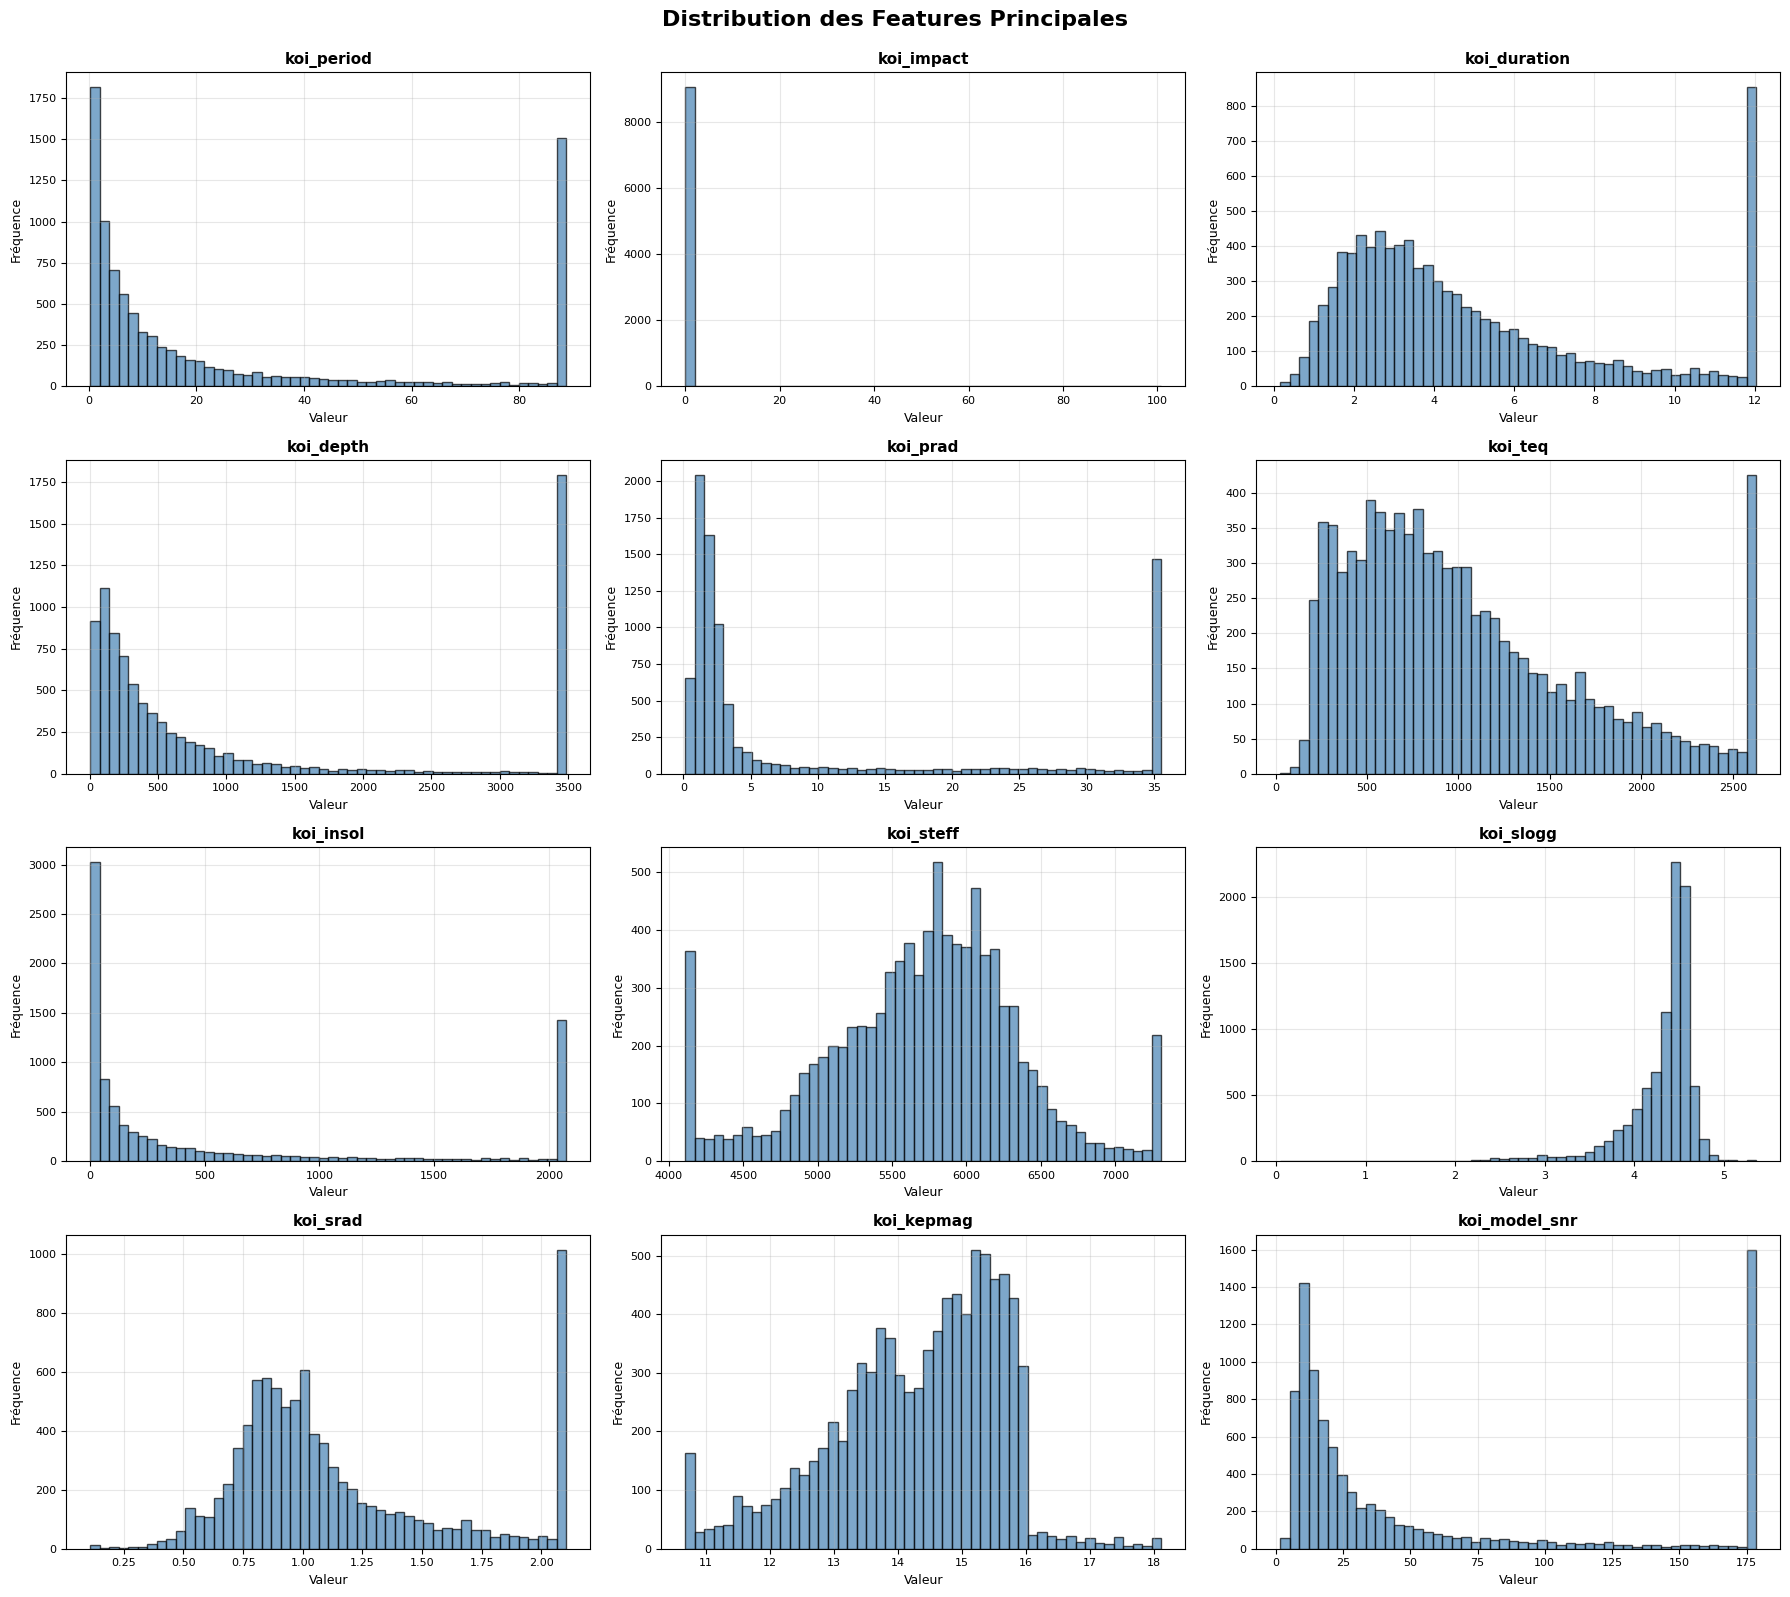

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
file_path = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_winsorized.csv"
df = pd.read_csv(file_path)

print(f"{'='*80}")
print(f"√âTAPE 2 - S√âLECTION DES FEATURES")
print(f"{'='*80}\n")

print(f"Dimensions du dataset: {df.shape}\n")

# ================================================================================
# 1. IDENTIFICATION DES COLONNES
# ================================================================================

print(f"{'='*80}")
print(f"1. IDENTIFICATION DES COLONNES")
print(f"{'='*80}\n")

print("Toutes les colonnes du dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

# ================================================================================
# 2. COLONNES √Ä EXCLURE
# ================================================================================

print(f"\n{'='*80}")
print(f"2. COLONNES √Ä EXCLURE")
print(f"{'='*80}\n")

# Colonnes d'identification (non pertinentes pour la pr√©diction)
id_columns = ['kepid', 'kepoi_name']

# Variable cible
target_column = 'koi_disposition'

# Colonnes supprim√©es pr√©c√©demment ou non pertinentes
removed_columns = []  # Si vous en avez supprim√© d'autres

# Liste compl√®te des colonnes √† exclure
exclude_columns = id_columns + [target_column] + removed_columns

print("Colonnes √† exclure:")
for col in exclude_columns:
    if col in df.columns:
        print(f"  ‚úó {col}")
        reason = ""
        if col in id_columns:
            reason = "(Identifiant)"
        elif col == target_column:
            reason = "(Variable cible)"
        else:
            reason = "(Supprim√©e)"
        print(f"     ‚Üí Raison: {reason}")

# ================================================================================
# 3. S√âPARATION X (FEATURES) ET y (TARGET)
# ================================================================================

print(f"\n{'='*80}")
print(f"3. S√âPARATION X (FEATURES) ET y (TARGET)")
print(f"{'='*80}\n")

# V√©rifier que la variable cible existe
if target_column not in df.columns:
    print(f"‚ùå Erreur: La colonne '{target_column}' n'existe pas!")
else:
    # S√©parer X et y
    y = df[target_column].copy()
    X = df.drop(columns=exclude_columns, errors='ignore')
    
    print(f"‚úì S√©paration effectu√©e:")
    print(f"  ‚Ä¢ X (Features): {X.shape}")
    print(f"  ‚Ä¢ y (Target): {y.shape}")
    
    print(f"\n‚úì Nombre de features s√©lectionn√©es: {X.shape[1]}")
    print(f"‚úì Nombre d'observations: {X.shape[0]}")

# ================================================================================
# 4. LISTE DES FEATURES S√âLECTIONN√âES
# ================================================================================

print(f"\n{'='*80}")
print(f"4. FEATURES S√âLECTIONN√âES")
print(f"{'='*80}\n")

print(f"Liste des {X.shape[1]} features:")
for i, col in enumerate(X.columns, 1):
    print(f"  {i:2d}. {col}")

# ================================================================================
# 5. CAT√âGORISATION DES FEATURES
# ================================================================================

print(f"\n{'='*80}")
print(f"5. CAT√âGORISATION DES FEATURES")
print(f"{'='*80}\n")

# Cat√©goriser les features par type
feature_categories = {
    'P√©riode': [],
    'Impact': [],
    'Dur√©e': [],
    'Profondeur': [],
    'Rayon plan√©taire': [],
    'Temp√©rature': [],
    'Insolation': [],
    '√âtoile (Temp√©rature)': [],
    '√âtoile (Gravit√©)': [],
    '√âtoile (Rayon)': [],
    'Magnitude': [],
    'SNR': [],
    'Autres': []
}

for col in X.columns:
    if 'period' in col.lower():
        feature_categories['P√©riode'].append(col)
    elif 'impact' in col.lower():
        feature_categories['Impact'].append(col)
    elif 'duration' in col.lower():
        feature_categories['Dur√©e'].append(col)
    elif 'depth' in col.lower():
        feature_categories['Profondeur'].append(col)
    elif 'prad' in col.lower():
        feature_categories['Rayon plan√©taire'].append(col)
    elif 'teq' in col.lower():
        feature_categories['Temp√©rature'].append(col)
    elif 'insol' in col.lower():
        feature_categories['Insolation'].append(col)
    elif 'steff' in col.lower():
        feature_categories['√âtoile (Temp√©rature)'].append(col)
    elif 'slogg' in col.lower():
        feature_categories['√âtoile (Gravit√©)'].append(col)
    elif 'srad' in col.lower():
        feature_categories['√âtoile (Rayon)'].append(col)
    elif 'kepmag' in col.lower():
        feature_categories['Magnitude'].append(col)
    elif 'snr' in col.lower():
        feature_categories['SNR'].append(col)
    else:
        feature_categories['Autres'].append(col)

# Afficher les cat√©gories
for category, features in feature_categories.items():
    if features:
        print(f"\n{category} ({len(features)} features):")
        for feat in features:
            print(f"  ‚Ä¢ {feat}")

# ================================================================================
# 6. TYPES DE DONN√âES
# ================================================================================

print(f"\n{'='*80}")
print(f"6. TYPES DE DONN√âES")
print(f"{'='*80}\n")

print("Distribution des types de donn√©es:")
print(X.dtypes.value_counts())

print("\nD√©tail par colonne:")
for dtype in X.dtypes.unique():
    cols_of_type = X.select_dtypes(include=[dtype]).columns.tolist()
    print(f"\n{dtype} ({len(cols_of_type)} colonnes):")
    for col in cols_of_type[:5]:  # Afficher les 5 premi√®res
        print(f"  ‚Ä¢ {col}")
    if len(cols_of_type) > 5:
        print(f"  ... et {len(cols_of_type) - 5} autres")

# ================================================================================
# 7. STATISTIQUES DESCRIPTIVES
# ================================================================================

print(f"\n{'='*80}")
print(f"7. APER√áU DES DONN√âES (5 premi√®res lignes)")
print(f"{'='*80}\n")

print(X.head())

print(f"\n{'='*80}")
print(f"8. STATISTIQUES DESCRIPTIVES")
print(f"{'='*80}\n")

stats = X.describe()
print(stats)

# ================================================================================
# 9. VISUALISATION DE LA DISTRIBUTION DES FEATURES
# ================================================================================

print(f"\n{'='*80}")
print(f"9. VISUALISATION")
print(f"{'='*80}\n")

# S√©lectionner quelques features importantes pour visualisation
key_features = ['koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 
                'koi_prad', 'koi_teq', 'koi_insol', 'koi_steff', 
                'koi_slogg', 'koi_srad', 'koi_kepmag', 'koi_model_snr']

key_features = [f for f in key_features if f in X.columns]

# Cr√©er des histogrammes
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for idx, col in enumerate(key_features):
    axes[idx].hist(X[col].dropna(), bins=50, color='steelblue', 
                   edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontweight='bold', fontsize=11)
    axes[idx].set_xlabel('Valeur', fontsize=9)
    axes[idx].set_ylabel('Fr√©quence', fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(labelsize=8)

# Masquer les axes vides
for idx in range(len(key_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution des Features Principales', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_features_distribution.png', 
            dpi=300, bbox_inches='tight')

print("‚úì Graphiques sauvegard√©s: step2_features_distribution.png")

# ================================================================================
# 10. SAUVEGARDE DES DONN√âES
# ================================================================================

print(f"\n{'='*80}")
print(f"10. SAUVEGARDE")
print(f"{'='*80}\n")

# Sauvegarder X et y s√©par√©ment
X.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_X_features.csv', index=False)
y.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_y_target.csv', index=False)

print("‚úì Fichiers sauvegard√©s:")
print("  1. step2_X_features.csv - Features (X)")
print("  2. step2_y_target.csv - Target (y)")

# Sauvegarder la liste des features avec leur cat√©gorie
feature_info = []
for category, features in feature_categories.items():
    for feat in features:
        feature_info.append({
            'Feature': feat,
            'Cat√©gorie': category,
            'Type': str(X[feat].dtype),
            'Non-Null': X[feat].notna().sum(),
            'Null': X[feat].isna().sum()
        })

feature_info_df = pd.DataFrame(feature_info)
feature_info_df.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_features_info.csv', 
                       index=False)

print("  3. step2_features_info.csv - Informations d√©taill√©es sur les features")

# ================================================================================
# 11. R√âSUM√â
# ================================================================================

print(f"\n{'='*80}")
print(f"R√âSUM√â DE L'√âTAPE 2")
print(f"{'='*80}\n")

summary = {
    'Dataset original': df.shape,
    'Features (X)': X.shape,
    'Target (y)': y.shape,
    'Colonnes exclues': len(exclude_columns),
    'Features num√©riques': len(X.select_dtypes(include=[np.number]).columns),
    'Features cat√©gorielles': len(X.select_dtypes(exclude=[np.number]).columns),
}

for key, value in summary.items():
    print(f"  {key}: {value}")

print(f"\n{'='*80}")
print(f"√âTAPE 2 TERMIN√âE ‚úì")
print(f"{'='*80}")
print("\nFichiers g√©n√©r√©s:")
print("  1. step2_X_features.csv - Matrix des features")
print("  2. step2_y_target.csv - Vecteur cible")
print("  3. step2_features_distribution.png - Visualisations")
print("  4. step2_features_info.csv - Documentation des features")
print("\n‚û°Ô∏è  Passer √† l'√âtape 3: V√©rification finale des donn√©es")

√âTAPE 3 - V√âRIFICATION FINALE DES DONN√âES

Dimensions X: (9110, 33)
Dimensions y: (9110, 1)

1. V√âRIFICATION DES VALEURS MANQUANTES

‚úì Aucune valeur manquante d√©tect√©e dans X
‚úì Aucune valeur manquante dans y

2. V√âRIFICATION DES VALEURS INFINIES

‚úì Aucune valeur infinie d√©tect√©e

3. V√âRIFICATION DES TYPES DE DONN√âES

Distribution des types de donn√©es:
float64    33
Name: count, dtype: int64

‚úì Toutes les colonnes sont num√©riques

4. V√âRIFICATION DES RANGES DE VALEURS

Range des valeurs pour features principales:

      Feature       Min       Max      Mean       Std
   koi_period    0.2418   88.7212   25.8522   32.1211
     koi_prad    0.1400   35.5537    9.8915   13.1548
    koi_depth    4.5000 3485.8875 1085.7320 1292.8424
      koi_teq   25.0000 2628.0000 1032.5424  644.3503
    koi_steff 4111.5000 7307.5000 5695.4442  668.0875
     koi_srad    0.1090    2.1040    1.1417    0.4582
koi_model_snr    1.6000  178.6000   56.7057   63.3019

5. V√âRIFICATION DE LA COH

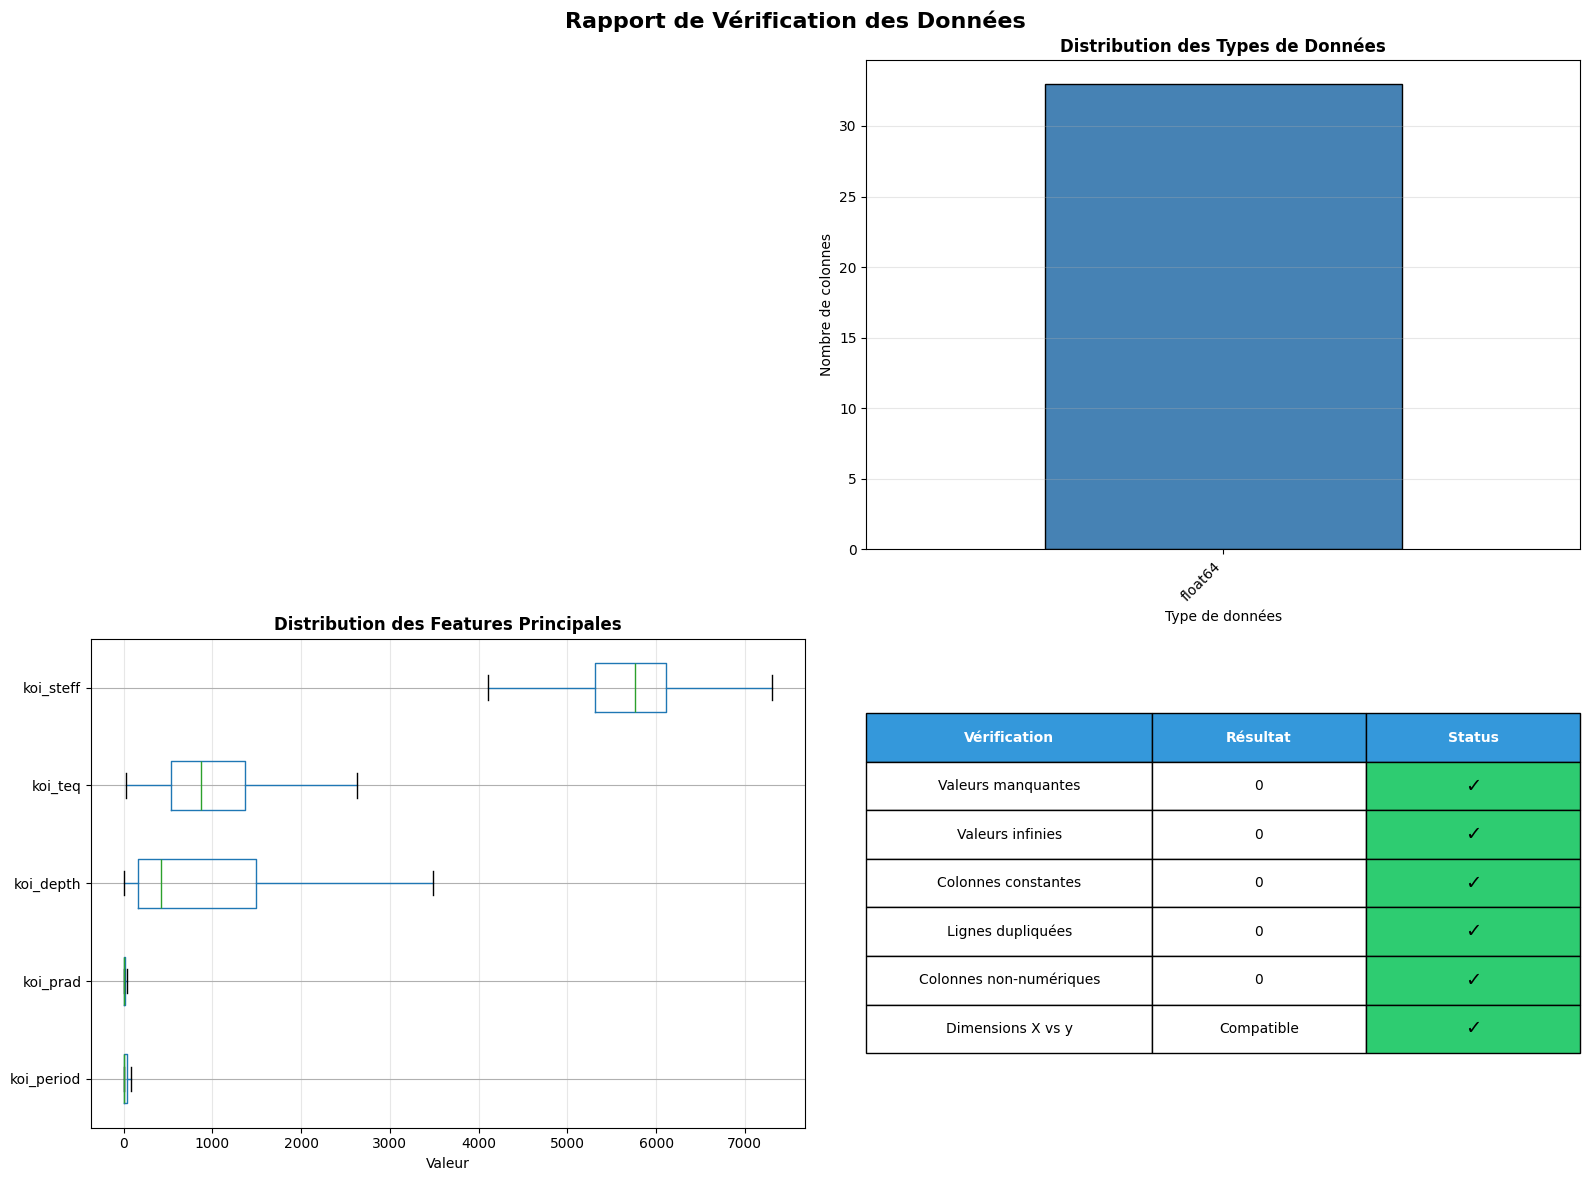

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les donn√©es pr√©par√©es
X = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_X_features.csv')
y = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_y_target.csv')

print(f"{'='*80}")
print(f"√âTAPE 3 - V√âRIFICATION FINALE DES DONN√âES")
print(f"{'='*80}\n")

print(f"Dimensions X: {X.shape}")
print(f"Dimensions y: {y.shape}\n")

# ================================================================================
# 1. V√âRIFICATION DES VALEURS MANQUANTES
# ================================================================================

print(f"{'='*80}")
print(f"1. V√âRIFICATION DES VALEURS MANQUANTES")
print(f"{'='*80}\n")

# Comptage des valeurs manquantes
missing_counts = X.isnull().sum()
missing_percentages = (X.isnull().sum() / len(X)) * 100

# Cr√©er un DataFrame pour l'affichage
missing_df = pd.DataFrame({
    'Feature': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percentage': missing_percentages.values
})

# Trier par nombre de valeurs manquantes
missing_df = missing_df.sort_values('Missing_Count', ascending=False)

# Afficher seulement les colonnes avec des valeurs manquantes
missing_df_filtered = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_df_filtered) > 0:
    print(f"‚ö†Ô∏è  {len(missing_df_filtered)} colonnes avec valeurs manquantes:\n")
    print(missing_df_filtered.to_string(index=False))
    print(f"\n‚ùå ATTENTION: Des valeurs manquantes ont √©t√© d√©tect√©es!")
    print("   ‚Üí Il faut les traiter avant de continuer")
else:
    print("‚úì Aucune valeur manquante d√©tect√©e dans X")

# V√©rifier y
missing_y = y.isnull().sum().sum()
if missing_y > 0:
    print(f"\n‚ö†Ô∏è  {missing_y} valeurs manquantes dans y")
else:
    print("‚úì Aucune valeur manquante dans y")

# Visualisation des valeurs manquantes
if len(missing_df_filtered) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(missing_df_filtered['Feature'][:20], missing_df_filtered['Missing_Percentage'][:20], 
             color='#e74c3c', edgecolor='black')
    plt.xlabel('Pourcentage de valeurs manquantes (%)', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title('Top 20 Features avec Valeurs Manquantes', fontsize=14, fontweight='bold', pad=15)
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step3_missing_values.png', 
                dpi=300, bbox_inches='tight')
    print("\n‚úì Graphique sauvegard√©: step3_missing_values.png")

# ================================================================================
# 2. V√âRIFICATION DES VALEURS INFINIES
# ================================================================================

print(f"\n{'='*80}")
print(f"2. V√âRIFICATION DES VALEURS INFINIES")
print(f"{'='*80}\n")

# V√©rifier les valeurs infinies
inf_counts = np.isinf(X.select_dtypes(include=[np.number])).sum()
inf_counts_filtered = inf_counts[inf_counts > 0]

if len(inf_counts_filtered) > 0:
    print(f"‚ö†Ô∏è  {len(inf_counts_filtered)} colonnes avec valeurs infinies:\n")
    for col, count in inf_counts_filtered.items():
        print(f"  ‚Ä¢ {col}: {count} valeurs infinies")
    print(f"\n‚ùå ATTENTION: Des valeurs infinies ont √©t√© d√©tect√©es!")
    print("   ‚Üí Il faut les traiter avant de continuer")
else:
    print("‚úì Aucune valeur infinie d√©tect√©e")

# ================================================================================
# 3. V√âRIFICATION DES TYPES DE DONN√âES
# ================================================================================

print(f"\n{'='*80}")
print(f"3. V√âRIFICATION DES TYPES DE DONN√âES")
print(f"{'='*80}\n")

print("Distribution des types de donn√©es:")
type_counts = X.dtypes.value_counts()
print(type_counts)

# V√©rifier s'il y a des colonnes non num√©riques
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()

if len(non_numeric) > 0:
    print(f"\n‚ö†Ô∏è  {len(non_numeric)} colonnes non-num√©riques d√©tect√©es:")
    for col in non_numeric:
        print(f"  ‚Ä¢ {col} ({X[col].dtype})")
        print(f"    Valeurs uniques: {X[col].nunique()}")
        print(f"    Exemples: {X[col].unique()[:5].tolist()}")
    print("\nüí° Ces colonnes n√©cessitent un encodage avant la mod√©lisation")
else:
    print("\n‚úì Toutes les colonnes sont num√©riques")

# ================================================================================
# 4. V√âRIFICATION DES VALEURS ABERRANTES (RANGE)
# ================================================================================

print(f"\n{'='*80}")
print(f"4. V√âRIFICATION DES RANGES DE VALEURS")
print(f"{'='*80}\n")

# Statistiques min/max pour quelques colonnes cl√©s
key_features = ['koi_period', 'koi_prad', 'koi_depth', 'koi_teq', 
                'koi_steff', 'koi_srad', 'koi_model_snr']
key_features = [f for f in key_features if f in X.columns]

print("Range des valeurs pour features principales:\n")
range_data = []
for col in key_features:
    range_data.append({
        'Feature': col,
        'Min': f"{X[col].min():.4f}",
        'Max': f"{X[col].max():.4f}",
        'Mean': f"{X[col].mean():.4f}",
        'Std': f"{X[col].std():.4f}"
    })

range_df = pd.DataFrame(range_data)
print(range_df.to_string(index=False))

# ================================================================================
# 5. V√âRIFICATION DE LA COH√âRENCE DES DIMENSIONS
# ================================================================================

print(f"\n{'='*80}")
print(f"5. V√âRIFICATION DE LA COH√âRENCE DES DIMENSIONS")
print(f"{'='*80}\n")

# V√©rifier que X et y ont le m√™me nombre de lignes
if X.shape[0] == y.shape[0]:
    print(f"‚úì X et y ont le m√™me nombre d'observations: {X.shape[0]}")
else:
    print(f"‚ùå ERREUR: Dimensions incompatibles!")
    print(f"   X: {X.shape[0]} lignes")
    print(f"   y: {y.shape[0]} lignes")

# V√©rifier qu'il n'y a pas de doublons d'index
if X.index.duplicated().any():
    print(f"\n‚ö†Ô∏è  {X.index.duplicated().sum()} index dupliqu√©s dans X")
else:
    print("‚úì Pas d'index dupliqu√© dans X")

# ================================================================================
# 6. V√âRIFICATION DES VALEURS CONSTANTES
# ================================================================================

print(f"\n{'='*80}")
print(f"6. V√âRIFICATION DES COLONNES CONSTANTES")
print(f"{'='*80}\n")

# Identifier les colonnes avec une seule valeur unique
constant_cols = []
for col in X.columns:
    if X[col].nunique() == 1:
        constant_cols.append(col)

if len(constant_cols) > 0:
    print(f"‚ö†Ô∏è  {len(constant_cols)} colonnes constantes d√©tect√©es:")
    for col in constant_cols:
        print(f"  ‚Ä¢ {col} (valeur: {X[col].unique()[0]})")
    print("\nüí° Ces colonnes n'apportent aucune information et devraient √™tre supprim√©es")
else:
    print("‚úì Aucune colonne constante d√©tect√©e")

# ================================================================================
# 7. V√âRIFICATION DES DUPLICATIONS DE LIGNES
# ================================================================================

print(f"\n{'='*80}")
print(f"7. V√âRIFICATION DES LIGNES DUPLIQU√âES")
print(f"{'='*80}\n")

# Compter les lignes dupliqu√©es
duplicated_rows = X.duplicated().sum()

if duplicated_rows > 0:
    print(f"‚ö†Ô∏è  {duplicated_rows} lignes dupliqu√©es d√©tect√©es")
    print(f"   Pourcentage: {(duplicated_rows/len(X)*100):.2f}%")
    print("\nüí° Consid√©rer la suppression des doublons")
else:
    print("‚úì Aucune ligne dupliqu√©e")

# ================================================================================
# 8. DISTRIBUTION DES VALEURS (SKEWNESS & KURTOSIS)
# ================================================================================

print(f"\n{'='*80}")
print(f"8. ANALYSE DE LA DISTRIBUTION (SKEWNESS & KURTOSIS)")
print(f"{'='*80}\n")

# Calculer skewness et kurtosis
numeric_cols = X.select_dtypes(include=[np.number]).columns
skew_data = []

for col in numeric_cols[:10]:  # Afficher les 10 premi√®res
    skewness = X[col].skew()
    kurtosis = X[col].kurtosis()
    skew_data.append({
        'Feature': col,
        'Skewness': f"{skewness:.2f}",
        'Kurtosis': f"{kurtosis:.2f}"
    })

skew_df = pd.DataFrame(skew_data)
print("Distribution des 10 premi√®res features:\n")
print(skew_df.to_string(index=False))

print("\nüí° Interpr√©tation:")
print("  ‚Ä¢ Skewness proche de 0: Distribution sym√©trique")
print("  ‚Ä¢ |Skewness| > 1: Distribution tr√®s asym√©trique ‚Üí Transformation n√©cessaire")
print("  ‚Ä¢ Kurtosis > 3: Distribution avec queues lourdes (outliers)")

# ================================================================================
# 9. VISUALISATION GLOBALE
# ================================================================================

print(f"\n{'='*80}")
print(f"9. G√âN√âRATION DES VISUALISATIONS")
print(f"{'='*80}\n")

# Cr√©er une figure avec plusieurs graphiques de v√©rification
fig = plt.figure(figsize=(16, 12))

# 9.1 Heatmap des valeurs manquantes (si pr√©sentes)
if len(missing_df_filtered) > 0:
    ax1 = plt.subplot(2, 2, 1)
    missing_matrix = X[missing_df_filtered['Feature'][:20]].isnull()
    sns.heatmap(missing_matrix, cbar=True, cmap='RdYlGn_r', ax=ax1)
    plt.title('Carte des Valeurs Manquantes', fontweight='bold', fontsize=12)
    plt.xlabel('Features')
    plt.ylabel('Observations')

# 9.2 Distribution des types de donn√©es
ax2 = plt.subplot(2, 2, 2)
type_counts.plot(kind='bar', color='steelblue', edgecolor='black', ax=ax2)
plt.title('Distribution des Types de Donn√©es', fontweight='bold', fontsize=12)
plt.xlabel('Type de donn√©es')
plt.ylabel('Nombre de colonnes')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# 9.3 Boxplot pour d√©tecter les outliers sur quelques features
ax3 = plt.subplot(2, 2, 3)
key_features_plot = [f for f in key_features if f in X.columns][:5]
X[key_features_plot].boxplot(ax=ax3, vert=False)
plt.title('Distribution des Features Principales', fontweight='bold', fontsize=12)
plt.xlabel('Valeur')
plt.grid(True, alpha=0.3, axis='x')

# 9.4 R√©sum√© des v√©rifications
ax4 = plt.subplot(2, 2, 4)
ax4.axis('tight')
ax4.axis('off')

# Cr√©er un tableau r√©capitulatif
verification_summary = [
    ['V√©rification', 'R√©sultat', 'Status'],
    ['Valeurs manquantes', f"{missing_counts.sum()}", '‚úì' if missing_counts.sum() == 0 else '‚ö†Ô∏è'],
    ['Valeurs infinies', f"{inf_counts.sum()}", '‚úì' if inf_counts.sum() == 0 else '‚ö†Ô∏è'],
    ['Colonnes constantes', f"{len(constant_cols)}", '‚úì' if len(constant_cols) == 0 else '‚ö†Ô∏è'],
    ['Lignes dupliqu√©es', f"{duplicated_rows}", '‚úì' if duplicated_rows == 0 else '‚ö†Ô∏è'],
    ['Colonnes non-num√©riques', f"{len(non_numeric)}", '‚úì' if len(non_numeric) == 0 else '‚ö†Ô∏è'],
    ['Dimensions X vs y', 'Compatible', '‚úì' if X.shape[0] == y.shape[0] else '‚ùå']
]

table = ax4.table(cellText=verification_summary,
                  cellLoc='center',
                  loc='center',
                  colWidths=[0.4, 0.3, 0.3])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Style du tableau
for i in range(len(verification_summary)):
    for j in range(3):
        cell = table[(i, j)]
        if i == 0:  # Header
            cell.set_facecolor('#3498db')
            cell.set_text_props(weight='bold', color='white')
        else:
            if j == 2:  # Colonne Status
                if verification_summary[i][2] == '‚úì':
                    cell.set_facecolor('#2ecc71')
                elif verification_summary[i][2] == '‚ö†Ô∏è':
                    cell.set_facecolor('#f39c12')
                else:
                    cell.set_facecolor('#e74c3c')
                cell.set_text_props(weight='bold', fontsize=14)

plt.suptitle('Rapport de V√©rification des Donn√©es', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step3_verification_report.png', 
            dpi=300, bbox_inches='tight')

print("‚úì Rapport visuel sauvegard√©: step3_verification_report.png")

# ================================================================================
# 10. EXPORT DU RAPPORT DE V√âRIFICATION
# ================================================================================

print(f"\n{'='*80}")
print(f"10. EXPORT DU RAPPORT")
print(f"{'='*80}\n")

# Cr√©er un rapport complet
report = {
    'Total Observations': [X.shape[0]],
    'Total Features': [X.shape[1]],
    'Valeurs Manquantes': [missing_counts.sum()],
    'Valeurs Infinies': [inf_counts.sum()],
    'Colonnes Constantes': [len(constant_cols)],
    'Lignes Dupliqu√©es': [duplicated_rows],
    'Colonnes Non-Num√©riques': [len(non_numeric)],
    'Dimensions Coh√©rentes': ['Oui' if X.shape[0] == y.shape[0] else 'Non']
}

report_df = pd.DataFrame(report).T
report_df.columns = ['Valeur']
report_df.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step3_verification_report.csv')

print("‚úì Rapport d√©taill√© sauvegard√©: step3_verification_report.csv")

# ================================================================================
# 11. D√âCISION FINALE
# ================================================================================

print(f"\n{'='*80}")
print(f"11. D√âCISION FINALE")
print(f"{'='*80}\n")

# V√©rifier si les donn√©es sont pr√™tes
issues = []

if missing_counts.sum() > 0:
    issues.append(f"‚Ä¢ {missing_counts.sum()} valeurs manquantes")
if inf_counts.sum() > 0:
    issues.append(f"‚Ä¢ {inf_counts.sum()} valeurs infinies")
if len(constant_cols) > 0:
    issues.append(f"‚Ä¢ {len(constant_cols)} colonnes constantes")
if len(non_numeric) > 0:
    issues.append(f"‚Ä¢ {len(non_numeric)} colonnes non-num√©riques")
if X.shape[0] != y.shape[0]:
    issues.append("‚Ä¢ Dimensions X et y incompatibles")

if len(issues) == 0:
    print("‚úÖ DONN√âES PR√äTES POUR L'ANALYSE DE CORR√âLATION!")
    print("\n‚úì Toutes les v√©rifications sont pass√©es avec succ√®s")
    print("‚úì Aucun probl√®me d√©tect√©")
else:
    print("‚ö†Ô∏è  PROBL√àMES D√âTECT√âS:")
    for issue in issues:
        print(f"  {issue}")
    print("\nüí° Actions recommand√©es:")
    if missing_counts.sum() > 0:
        print("  ‚Üí Traiter les valeurs manquantes (imputation ou suppression)")
    if inf_counts.sum() > 0:
        print("  ‚Üí Remplacer les valeurs infinies")
    if len(constant_cols) > 0:
        print("  ‚Üí Supprimer les colonnes constantes")
    if len(non_numeric) > 0:
        print("  ‚Üí Encoder les colonnes non-num√©riques")

print(f"\n{'='*80}")
print(f"√âTAPE 3 TERMIN√âE ‚úì")
print(f"{'='*80}")
print("\nFichiers g√©n√©r√©s:")
print("  1. step3_verification_report.png - Rapport visuel")
print("  2. step3_verification_report.csv - Rapport d√©taill√©")
if len(missing_df_filtered) > 0:
    print("  3. step3_missing_values.png - Analyse des valeurs manquantes")

if len(issues) == 0:
    print("\n‚û°Ô∏è  Passer √† l'√âtape 4: Analyse de corr√©lation")
else:
    print("\n‚ö†Ô∏è  Corriger les probl√®mes avant de continuer")

√âTAPE 4 - ANALYSE DE CORR√âLATION

Dimensions X: (9110, 33)
Dimensions y: (9110, 1)

1. CALCUL DE LA MATRICE DE CORR√âLATION

Nombre de features num√©riques: 33
‚úì Matrice de corr√©lation calcul√©e: (33, 33)

2. IDENTIFICATION DES CORR√âLATIONS √âLEV√âES

Corr√©lations TR√àS √âLEV√âES (|r| > 0.9):
Nombre de paires: 7

        Feature_1         Feature_2  Correlation
   koi_depth_err1    koi_depth_err2    -1.000000
koi_duration_err1 koi_duration_err2    -1.000000
  koi_period_err1   koi_period_err2    -1.000000
         koi_prad      koi_prad_log     0.962690
          koi_teq         koi_insol     0.936779
   koi_insol_err1    koi_insol_err2    -0.911774
       koi_period    koi_period_log     0.901604

‚ö†Ô∏è  MULTICOLIN√âARIT√â D√âTECT√âE!
üí° Recommandation: Supprimer une des deux features dans chaque paire

--------------------------------------------------------------------------------
Corr√©lations MOD√âR√âES √Ä √âLEV√âES (0.7 < |r| ‚â§ 0.9):
Nombre de paires: 18

     Feature

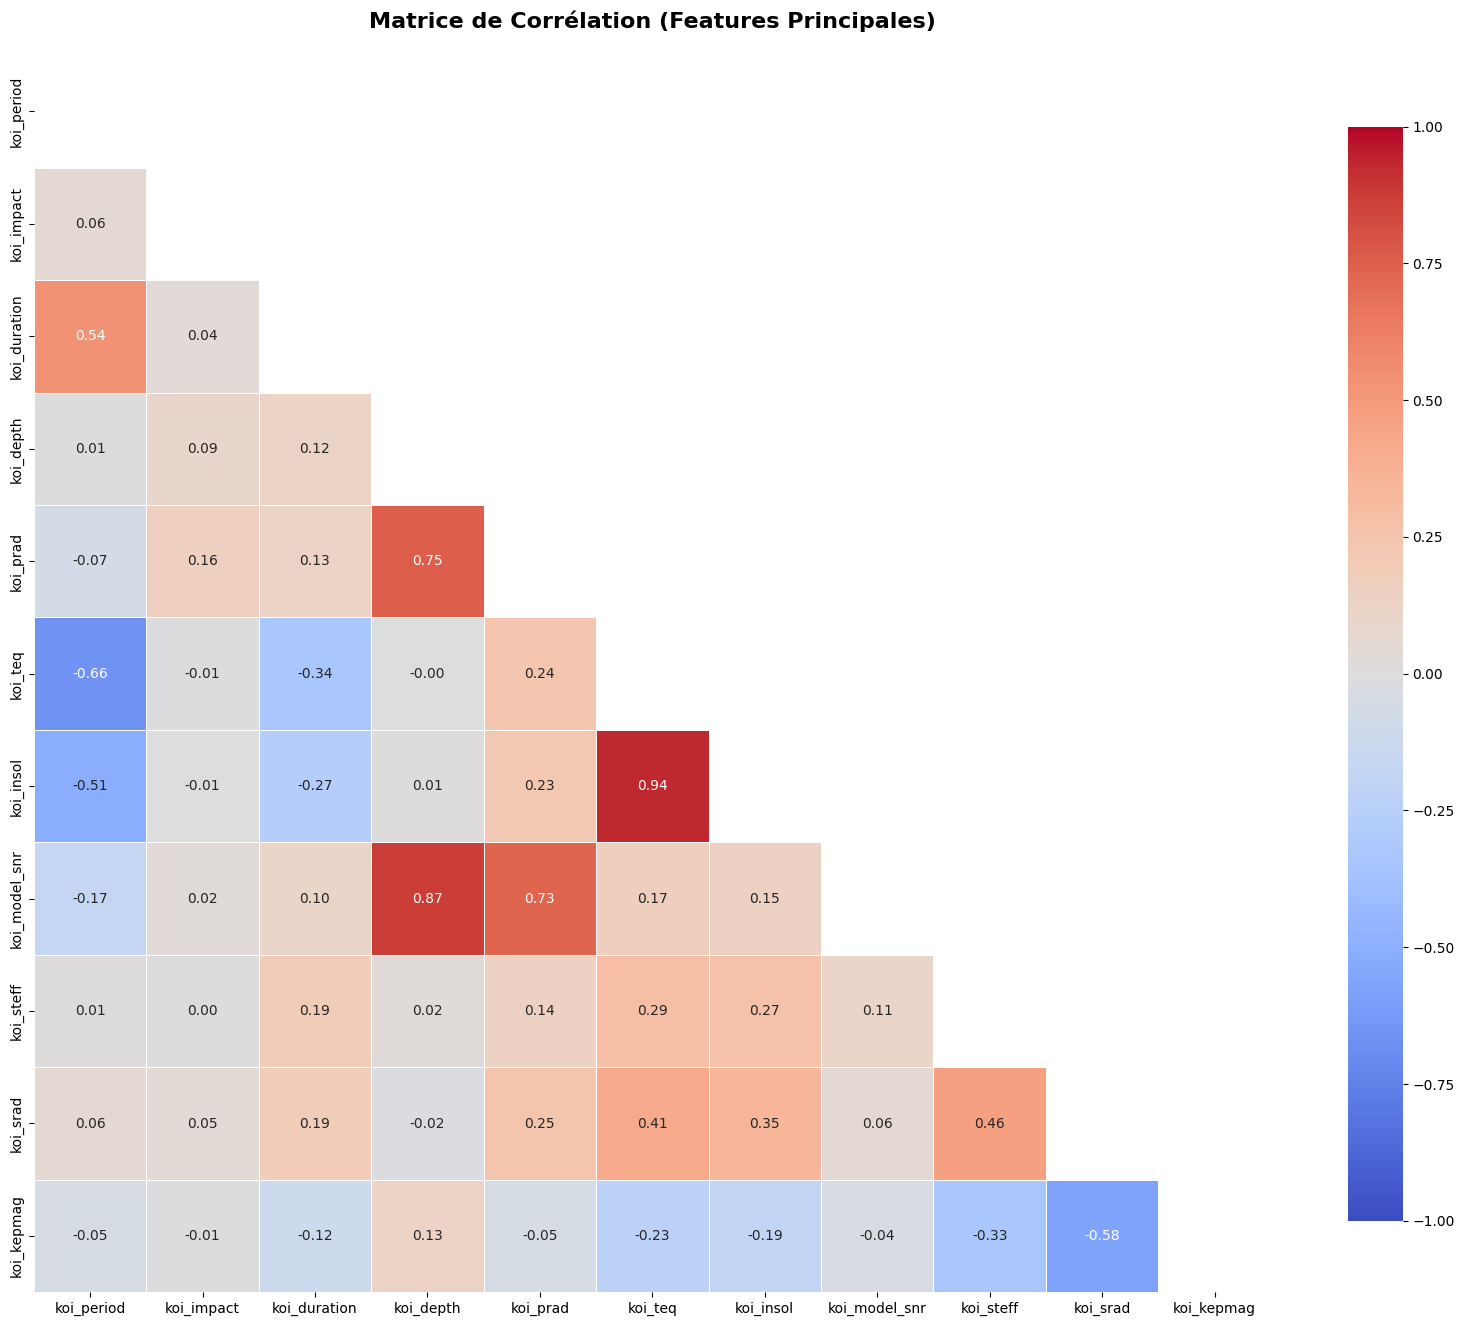

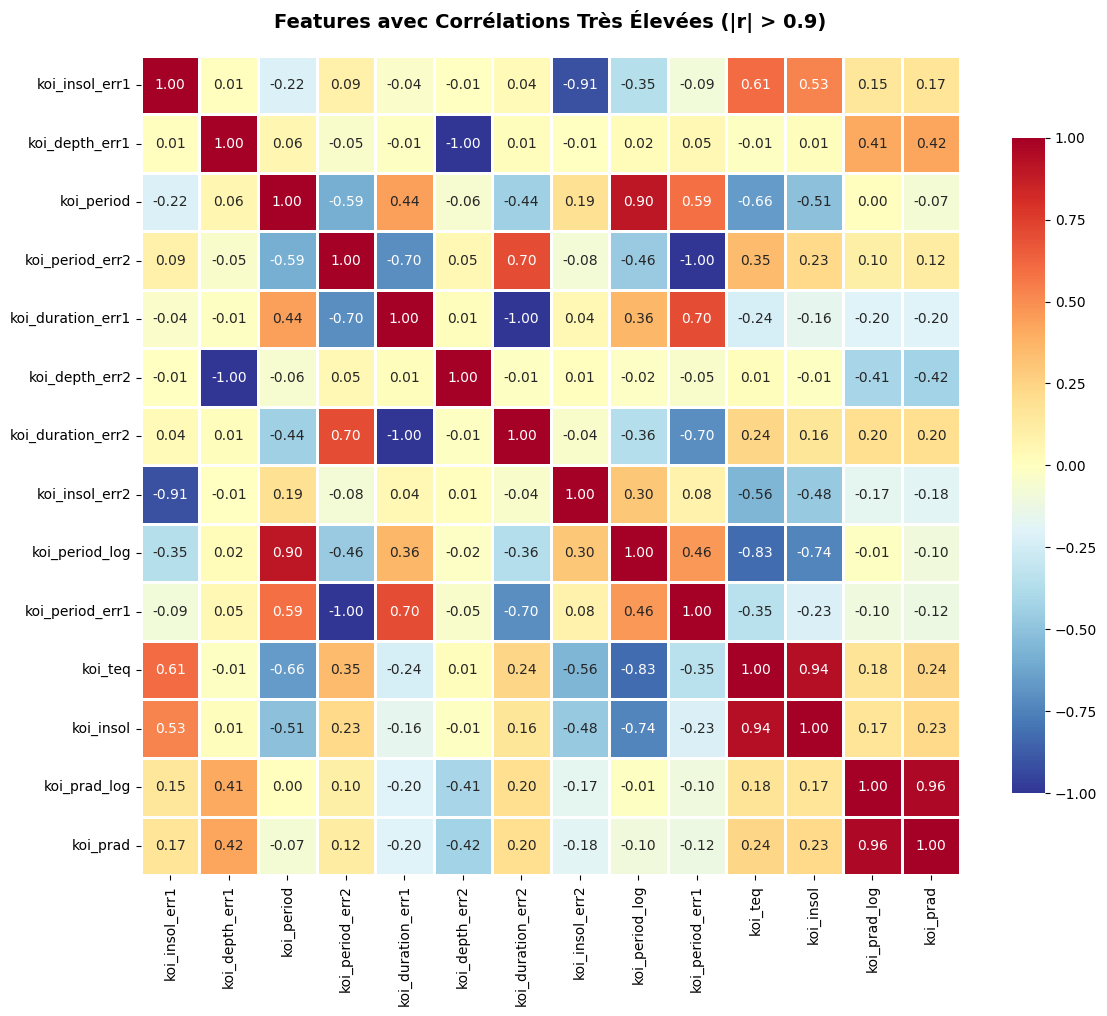

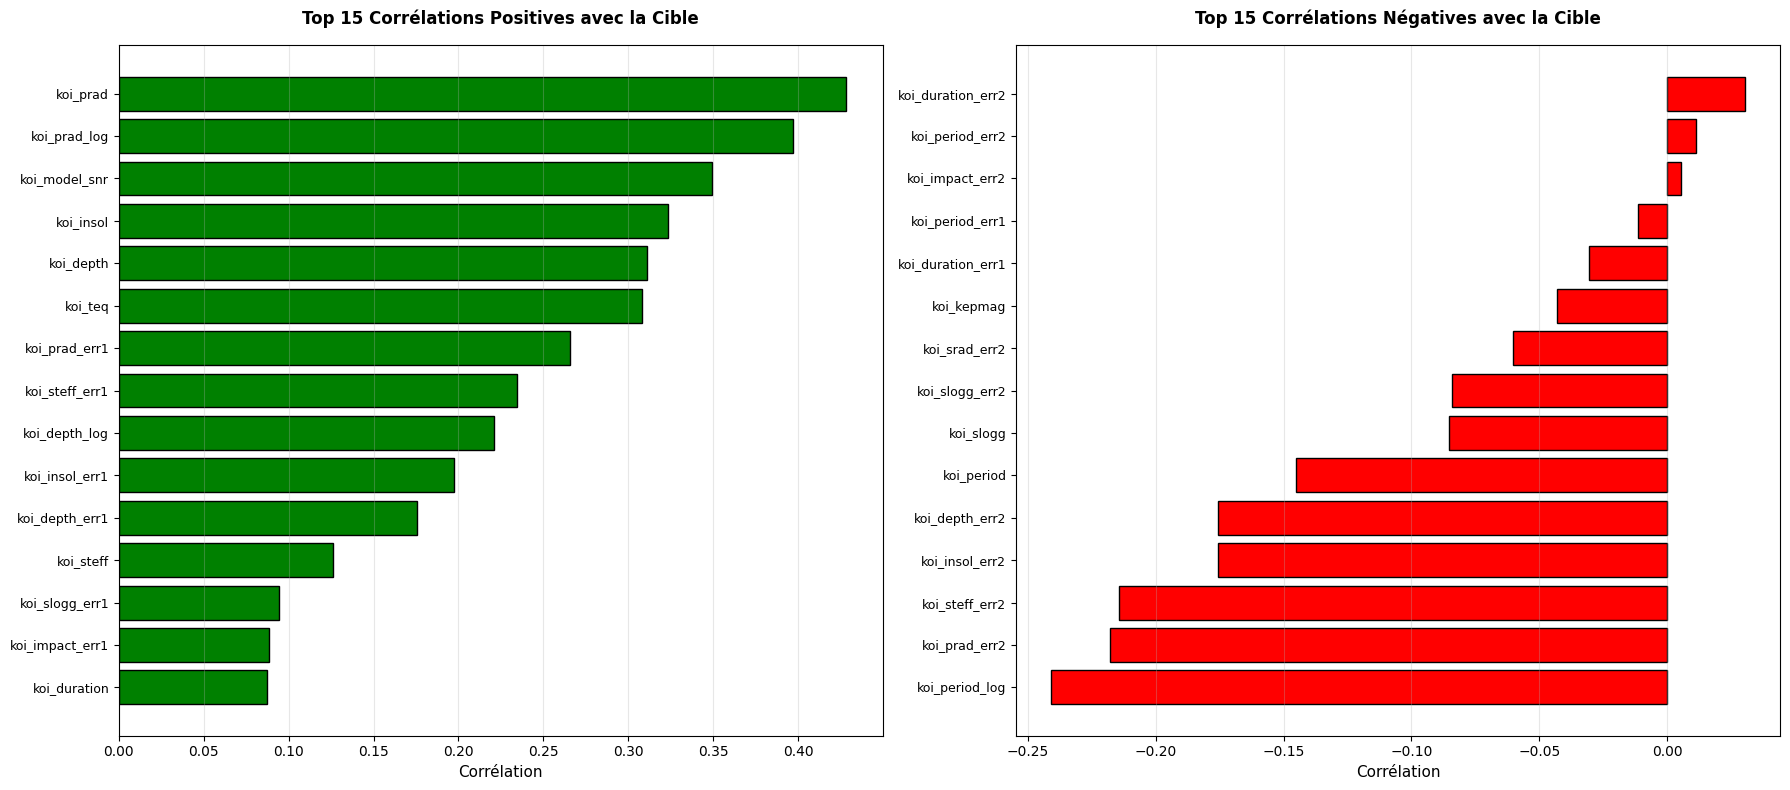

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Charger les donn√©es
X = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_X_features.csv')
y = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_y_target.csv')

print(f"{'='*80}")
print(f"√âTAPE 4 - ANALYSE DE CORR√âLATION")
print(f"{'='*80}\n")

print(f"Dimensions X: {X.shape}")
print(f"Dimensions y: {y.shape}\n")

# ================================================================================
# 1. MATRICE DE CORR√âLATION COMPL√àTE
# ================================================================================

print(f"{'='*80}")
print(f"1. CALCUL DE LA MATRICE DE CORR√âLATION")
print(f"{'='*80}\n")

# S√©lectionner uniquement les colonnes num√©riques
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print(f"Nombre de features num√©riques: {len(numeric_cols)}")

# Calculer la matrice de corr√©lation (Pearson)
correlation_matrix = X[numeric_cols].corr()
print(f"‚úì Matrice de corr√©lation calcul√©e: {correlation_matrix.shape}")

# ================================================================================
# 2. IDENTIFICATION DES CORR√âLATIONS √âLEV√âES
# ================================================================================

print(f"\n{'='*80}")
print(f"2. IDENTIFICATION DES CORR√âLATIONS √âLEV√âES")
print(f"{'='*80}\n")

# Extraire les paires de features avec corr√©lation √©lev√©e
high_corr_pairs = []
threshold_high = 0.9  # Corr√©lation tr√®s √©lev√©e
threshold_moderate = 0.7  # Corr√©lation mod√©r√©e √† √©lev√©e

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold_moderate:
            high_corr_pairs.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': corr_value,
                'Abs_Correlation': abs(corr_value)
            })

# Trier par corr√©lation absolue d√©croissante
high_corr_df = pd.DataFrame(high_corr_pairs)
high_corr_df = high_corr_df.sort_values('Abs_Correlation', ascending=False)

# S√©parer par niveau de corr√©lation
very_high = high_corr_df[high_corr_df['Abs_Correlation'] > threshold_high]
moderate_high = high_corr_df[(high_corr_df['Abs_Correlation'] > threshold_moderate) & 
                             (high_corr_df['Abs_Correlation'] <= threshold_high)]

print(f"Corr√©lations TR√àS √âLEV√âES (|r| > {threshold_high}):")
print(f"Nombre de paires: {len(very_high)}\n")

if len(very_high) > 0:
    print(very_high[['Feature_1', 'Feature_2', 'Correlation']].to_string(index=False))
    print("\n‚ö†Ô∏è  MULTICOLIN√âARIT√â D√âTECT√âE!")
    print("üí° Recommandation: Supprimer une des deux features dans chaque paire")
else:
    print("‚úì Aucune corr√©lation tr√®s √©lev√©e d√©tect√©e")

print(f"\n{'-'*80}")
print(f"Corr√©lations MOD√âR√âES √Ä √âLEV√âES ({threshold_moderate} < |r| ‚â§ {threshold_high}):")
print(f"Nombre de paires: {len(moderate_high)}\n")

if len(moderate_high) > 0:
    print(moderate_high[['Feature_1', 'Feature_2', 'Correlation']].head(10).to_string(index=False))
    if len(moderate_high) > 10:
        print(f"\n... et {len(moderate_high) - 10} autres paires")
    print("\nüí° Ces corr√©lations sont acceptables mais √† surveiller")
else:
    print("‚úì Aucune corr√©lation mod√©r√©e d√©tect√©e")

# ================================================================================
# 3. VISUALISATION DE LA MATRICE DE CORR√âLATION
# ================================================================================

print(f"\n{'='*80}")
print(f"3. VISUALISATION DE LA MATRICE DE CORR√âLATION")
print(f"{'='*80}\n")

# 3.1 Heatmap compl√®te (features principales seulement)
# S√©lectionner les features principales (sans les erreurs)
main_features = [col for col in numeric_cols if not any(x in col for x in ['err1', 'err2', 'log'])]

if len(main_features) > 25:
    main_features = main_features[:25]

print(f"Visualisation des {len(main_features)} features principales...\n")

plt.figure(figsize=(16, 14))
corr_subset = correlation_matrix.loc[main_features, main_features]
mask = np.triu(np.ones_like(corr_subset, dtype=bool))  # Masquer la moiti√© sup√©rieure

sns.heatmap(corr_subset, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0, 
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            vmin=-1, 
            vmax=1)

plt.title('Matrice de Corr√©lation (Features Principales)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step4_correlation_matrix.png', 
            dpi=300, bbox_inches='tight')

print("‚úì Heatmap sauvegard√©e: step4_correlation_matrix.png")

# 3.2 Heatmap des corr√©lations √©lev√©es uniquement
if len(very_high) > 0:
    # Extraire les features impliqu√©es dans les corr√©lations √©lev√©es
    high_corr_features = list(set(very_high['Feature_1'].tolist() + 
                                  very_high['Feature_2'].tolist()))
    
    if len(high_corr_features) > 2:
        plt.figure(figsize=(12, 10))
        corr_high = correlation_matrix.loc[high_corr_features, high_corr_features]
        
        sns.heatmap(corr_high, 
                    annot=True, 
                    fmt='.2f', 
                    cmap='RdYlBu_r',
                    center=0, 
                    square=True, 
                    linewidths=1,
                    cbar_kws={"shrink": 0.8},
                    vmin=-1, 
                    vmax=1)
        
        plt.title('Features avec Corr√©lations Tr√®s √âlev√©es (|r| > 0.9)', 
                  fontsize=14, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step4_high_correlation.png', 
                    dpi=300, bbox_inches='tight')
        
        print("‚úì Heatmap des corr√©lations √©lev√©es: step4_high_correlation.png")

# ================================================================================
# 4. ANALYSE DES CORR√âLATIONS AVEC LA VARIABLE CIBLE
# ================================================================================

print(f"\n{'='*80}")
print(f"4. CORR√âLATION AVEC LA VARIABLE CIBLE")
print(f"{'='*80}\n")

# Encoder la variable cible pour calculer la corr√©lation
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y.values.ravel())

# Cr√©er un DataFrame temporaire avec X et y
X_with_target = X[numeric_cols].copy()
X_with_target['target'] = y_encoded

# Calculer la corr√©lation avec la cible
target_correlation = X_with_target.corr()['target'].drop('target')
target_correlation = target_correlation.sort_values(ascending=False)

print("Top 15 features les plus corr√©l√©es avec la cible:\n")
print(f"{'Feature':<30} {'Corr√©lation':>12}")
print("-" * 43)
for feature, corr in target_correlation.head(15).items():
    print(f"{feature:<30} {corr:>12.4f}")

print("\n\nTop 15 features les moins corr√©l√©es (n√©gativement) avec la cible:\n")
print(f"{'Feature':<30} {'Corr√©lation':>12}")
print("-" * 43)
for feature, corr in target_correlation.tail(15).items():
    print(f"{feature:<30} {corr:>12.4f}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top corr√©lations positives
ax1 = axes[0]
top_positive = target_correlation.head(15)
ax1.barh(range(len(top_positive)), top_positive.values, color='green', edgecolor='black')
ax1.set_yticks(range(len(top_positive)))
ax1.set_yticklabels(top_positive.index, fontsize=9)
ax1.set_xlabel('Corr√©lation', fontsize=11)
ax1.set_title('Top 15 Corr√©lations Positives avec la Cible', 
              fontsize=12, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, axis='x')
ax1.invert_yaxis()

# Top corr√©lations n√©gatives
ax2 = axes[1]
top_negative = target_correlation.tail(15)
ax2.barh(range(len(top_negative)), top_negative.values, color='red', edgecolor='black')
ax2.set_yticks(range(len(top_negative)))
ax2.set_yticklabels(top_negative.index, fontsize=9)
ax2.set_xlabel('Corr√©lation', fontsize=11)
ax2.set_title('Top 15 Corr√©lations N√©gatives avec la Cible', 
              fontsize=12, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, axis='x')
ax2.invert_yaxis()

plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step4_target_correlation.png', 
            dpi=300, bbox_inches='tight')

print("\n‚úì Graphique sauvegard√©: step4_target_correlation.png")

# ================================================================================
# 5. IDENTIFICATION DES FEATURES REDONDANTES
# ================================================================================

print(f"\n{'='*80}")
print(f"5. RECOMMANDATIONS - FEATURES REDONDANTES")
print(f"{'='*80}\n")

if len(very_high) > 0:
    print("Features √† consid√©rer pour suppression (paires tr√®s corr√©l√©es):\n")
    
    # Grouper les features redondantes
    features_to_remove = set()
    
    for idx, row in very_high.iterrows():
        feat1 = row['Feature_1']
        feat2 = row['Feature_2']
        
        # Garder la feature la plus corr√©l√©e avec la cible
        corr1 = abs(target_correlation.get(feat1, 0))
        corr2 = abs(target_correlation.get(feat2, 0))
        
        if corr1 >= corr2:
            features_to_remove.add(feat2)
            print(f"  ‚Ä¢ Supprimer: {feat2}")
            print(f"    Raison: Corr√©l√© √† {feat1} (r={row['Correlation']:.3f})")
            print(f"    Corr avec cible: {feat1}={corr1:.3f}, {feat2}={corr2:.3f}\n")
        else:
            features_to_remove.add(feat1)
            print(f"  ‚Ä¢ Supprimer: {feat1}")
            print(f"    Raison: Corr√©l√© √† {feat2} (r={row['Correlation']:.3f})")
            print(f"    Corr avec cible: {feat1}={corr1:.3f}, {feat2}={corr2:.3f}\n")
    
    print(f"\nR√©sum√©: {len(features_to_remove)} features recommand√©es pour suppression")
    
    # Sauvegarder la liste
    pd.DataFrame({'Features_to_Remove': list(features_to_remove)}).to_csv(
        'C:/Users/chaym/Desktop/NasaProject/data/processed/step4_features_to_remove.csv',
        index=False
    )
    print("‚úì Liste sauvegard√©e: step4_features_to_remove.csv")
else:
    print("‚úì Aucune feature redondante d√©tect√©e")

# ================================================================================
# 6. EXPORT DES R√âSULTATS
# ================================================================================

print(f"\n{'='*80}")
print(f"6. EXPORT DES R√âSULTATS")
print(f"{'='*80}\n")

# Sauvegarder toutes les corr√©lations √©lev√©es
if len(high_corr_df) > 0:
    high_corr_df.to_csv(
        'C:/Users/chaym/Desktop/NasaProject/data/processed/step4_high_correlations.csv',
        index=False
    )
    print("‚úì Corr√©lations √©lev√©es: step4_high_correlations.csv")

# Sauvegarder les corr√©lations avec la cible
target_corr_df = pd.DataFrame({
    'Feature': target_correlation.index,
    'Correlation_with_Target': target_correlation.values
})
target_corr_df = target_corr_df.sort_values('Correlation_with_Target', 
                                            key=abs, ascending=False)
target_corr_df.to_csv(
    'C:/Users/chaym/Desktop/NasaProject/data/processed/step4_target_correlations.csv',
    index=False
)
print("‚úì Corr√©lations avec cible: step4_target_correlations.csv")

# ================================================================================
# 7. R√âSUM√â FINAL
# ================================================================================

print(f"\n{'='*80}")
print(f"R√âSUM√â DE L'ANALYSE DE CORR√âLATION")
print(f"{'='*80}\n")

summary = {
    'Total Features': len(numeric_cols),
    'Paires Tr√®s Corr√©l√©es (|r|>0.9)': len(very_high),
    'Paires Mod√©r√©ment Corr√©l√©es (0.7<|r|‚â§0.9)': len(moderate_high),
    'Features Redondantes Identifi√©es': len(features_to_remove) if len(very_high) > 0 else 0,
    'Feature Plus Corr√©l√©e (positive)': f"{target_correlation.idxmax()} ({target_correlation.max():.3f})",
    'Feature Plus Corr√©l√©e (n√©gative)': f"{target_correlation.idxmin()} ({target_correlation.min():.3f})"
}

for key, value in summary.items():
    print(f"  {key}: {value}")

print(f"\n{'='*80}")
print(f"√âTAPE 4 TERMIN√âE ‚úì")
print(f"{'='*80}")
print("\nFichiers g√©n√©r√©s:")
print("  1. step4_correlation_matrix.png - Matrice compl√®te")
if len(very_high) > 0:
    print("  2. step4_high_correlation.png - Features tr√®s corr√©l√©es")
print("  3. step4_target_correlation.png - Corr√©lations avec la cible")
print("  4. step4_high_correlations.csv - Liste des corr√©lations √©lev√©es")
print("  5. step4_target_correlations.csv - Corr√©lations avec cible")
if len(very_high) > 0:
    print("  6. step4_features_to_remove.csv - Features redondantes")

print("\nüí° Prochaines √©tapes recommand√©es:")
print("  1. Supprimer les features redondantes si n√©cessaire")
print("  2. Standardiser les features")
print("  3. Faire le split Train/Test avec stratification")
print("  4. Commencer la mod√©lisation")

if len(very_high) > 0:
    print("\n‚ö†Ô∏è  ATTENTION: Multicolin√©arit√© d√©tect√©e!")
    print("   ‚Üí Supprimer les features redondantes avant la mod√©lisation")
else:
    print("\n‚úÖ DONN√âES PR√äTES POUR LA MOD√âLISATION!")

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# ====================================================================
# √âTAPE 5 - SUPPRESSION DES FEATURES REDONDANTES ET STANDARDISATION
# ====================================================================

print("="*80)
print("√âTAPE 5 - SUPPRESSION DES FEATURES ET STANDARDISATION")
print("="*80)

# 1. CHARGEMENT DES DONN√âES
print("\n1. CHARGEMENT DES DONN√âES")
print("-"*80)

X = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_X_features.csv')
y = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_y_target.csv')

print(f"‚úì Dimensions initiales X: {X.shape}")
print(f"‚úì Dimensions y: {y.shape}")

# 2. SUPPRESSION DES FEATURES REDONDANTES
print("\n2. SUPPRESSION DES FEATURES REDONDANTES")
print("-"*80)

features_to_remove = [
    'koi_depth_err2',
    'koi_duration_err2', 
    'koi_period_err2',
    'koi_prad_log',
    'koi_period_log',
    'koi_depth_log'
]

print(f"Features √† supprimer: {len(features_to_remove)}")
for feat in features_to_remove:
    if feat in X.columns:
        print(f"  ‚úì Suppression: {feat}")
    else:
        print(f"  ‚ö†Ô∏è  Non trouv√©e: {feat}")

X_reduced = X.drop(columns=features_to_remove, errors='ignore')

print(f"\n‚úì Dimensions apr√®s suppression: {X_reduced.shape}")
print(f"‚úì Features supprim√©es: {X.shape[1] - X_reduced.shape[1]}")
print(f"‚úì Features restantes: {X_reduced.shape[1]}")

# 3. STANDARDISATION
print("\n3. STANDARDISATION DES FEATURES")
print("-"*80)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# Conversion en DataFrame pour garder les noms de colonnes
X_scaled_df = pd.DataFrame(X_scaled, columns=X_reduced.columns, index=X_reduced.index)

print(f"‚úì Standardisation appliqu√©e avec StandardScaler")
print(f"‚úì Moyenne apr√®s standardisation: {X_scaled_df.mean().mean():.6f} (‚âà 0)")
print(f"‚úì √âcart-type apr√®s standardisation: {X_scaled_df.std().mean():.6f} (‚âà 1)")

# 4. V√âRIFICATION DE LA STANDARDISATION
print("\n4. V√âRIFICATION DE LA STANDARDISATION")
print("-"*80)

print("\nExemple sur les 5 premi√®res features:")
print(f"{'Feature':<20} {'Moy. Avant':<15} {'Moy. Apr√®s':<15} {'Std Avant':<15} {'Std Apr√®s':<15}")
print("-"*85)

for col in X_reduced.columns[:5]:
    mean_before = X_reduced[col].mean()
    mean_after = X_scaled_df[col].mean()
    std_before = X_reduced[col].std()
    std_after = X_scaled_df[col].std()
    print(f"{col:<20} {mean_before:<15.2f} {mean_after:<15.6f} {std_before:<15.2f} {std_after:<15.6f}")

# 5. SAUVEGARDE DES R√âSULTATS
print("\n5. SAUVEGARDE DES R√âSULTATS")
print("-"*80)

# Sauvegarder les features standardis√©es
X_scaled_df.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step5_X_scaled.csv', index=False)
print("‚úì Features standardis√©es: step5_X_scaled.csv")

# Sauvegarder les features r√©duites (non standardis√©es)
X_reduced.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step5_X_reduced.csv', index=False)
print("‚úì Features r√©duites (avant scaling): step5_X_reduced.csv")

# Sauvegarder le scaler pour utilisation future
joblib.dump(scaler, 'C:/Users/chaym/Desktop/NasaProject/data/processed/step5_scaler.pkl')
print("‚úì Scaler sauvegard√©: step5_scaler.pkl")

# Sauvegarder la liste des features finales
features_final = pd.DataFrame({
    'feature_name': X_scaled_df.columns,
    'feature_index': range(len(X_scaled_df.columns))
})
features_final.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step5_final_features.csv', index=False)
print("‚úì Liste des features finales: step5_final_features.csv")

# 6. R√âSUM√â
print("\n" + "="*80)
print("R√âSUM√â DE L'√âTAPE 5")
print("="*80)

print(f"\n  Features initiales: {X.shape[1]}")
print(f"  Features supprim√©es: {len(features_to_remove)}")
print(f"  Features finales: {X_scaled_df.shape[1]}")
print(f"  Nombre d'observations: {X_scaled_df.shape[0]}")

print("\n‚úì Features supprim√©es:")
for feat in features_to_remove:
    print(f"    ‚Ä¢ {feat}")

print("\n‚úì Standardisation:")
print(f"    ‚Ä¢ M√©thode: StandardScaler (z-score)")
print(f"    ‚Ä¢ Moyenne: ‚âà 0")
print(f"    ‚Ä¢ √âcart-type: ‚âà 1")

print("\n" + "="*80)
print("√âTAPE 5 TERMIN√âE ‚úì")
print("="*80)

print("\nüí° Prochaines √©tapes:")
print("  1. Split Train/Test avec stratification")
print("  2. Commencer la mod√©lisation")
print("  3. √âvaluation des mod√®les")

√âTAPE 5 - SUPPRESSION DES FEATURES ET STANDARDISATION

1. CHARGEMENT DES DONN√âES
--------------------------------------------------------------------------------
‚úì Dimensions initiales X: (9110, 33)
‚úì Dimensions y: (9110, 1)

2. SUPPRESSION DES FEATURES REDONDANTES
--------------------------------------------------------------------------------
Features √† supprimer: 6
  ‚úì Suppression: koi_depth_err2
  ‚úì Suppression: koi_duration_err2
  ‚úì Suppression: koi_period_err2
  ‚úì Suppression: koi_prad_log
  ‚úì Suppression: koi_period_log
  ‚úì Suppression: koi_depth_log

‚úì Dimensions apr√®s suppression: (9110, 27)
‚úì Features supprim√©es: 6
‚úì Features restantes: 27

3. STANDARDISATION DES FEATURES
--------------------------------------------------------------------------------
‚úì Standardisation appliqu√©e avec StandardScaler
‚úì Moyenne apr√®s standardisation: -0.000000 (‚âà 0)
‚úì √âcart-type apr√®s standardisation: 1.000055 (‚âà 1)

4. V√âRIFICATION DE LA STANDARDISATION

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# ====================================================================
# √âTAPE 6 - SPLIT TRAIN/VAL/TEST STRATIFI√â + LABELISATION
# ====================================================================

print("="*80)
print("√âTAPE 6 - SPLIT TRAIN/VAL/TEST STRATIFI√â + LABELISATION")
print("="*80)

# 1. CHARGEMENT DES DONN√âES
print("\n1. CHARGEMENT DES DONN√âES")
print("-"*80)

X_scaled = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step5_X_scaled.csv')
y_original = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_y_target.csv')

print(f"‚úì Dimensions X: {X_scaled.shape}")
print(f"‚úì Dimensions y: {y_original.shape}")

# 2. LABELISATION DE LA VARIABLE CIBLE
print("\n2. LABELISATION DE LA VARIABLE CIBLE")
print("-"*80)

# Mapping des classes vers des labels num√©riques
label_mapping = {
    'FALSE POSITIVE': 0,
    'CANDIDATE': 1,
    'CONFIRMED': 2
}

# Application du mapping
y_labeled = y_original.copy()
y_labeled['koi_disposition'] = y_labeled['koi_disposition'].map(label_mapping)

print("‚úì Mapping appliqu√©:")
for class_name, label in label_mapping.items():
    count = (y_labeled['koi_disposition'] == label).sum()
    print(f"  {label} ‚Üê {class_name:<15} ({count} obs)")

# 3. V√âRIFICATION DE LA DISTRIBUTION INITIALE
print("\n3. DISTRIBUTION INITIALE DES CLASSES")
print("-"*80)

initial_dist = y_labeled['koi_disposition'].value_counts().sort_index()
print("\nNombre d'observations par classe:")
for label, count in initial_dist.items():
    class_name = [k for k, v in label_mapping.items() if v == label][0]
    pct = (count / len(y_labeled)) * 100
    print(f"  Classe {label} ({class_name:<15}): {count:>4} obs ({pct:>5.2f}%)")

# 4. SPLIT TRAIN/TEMP (80% / 20%)
print("\n4. PREMIER SPLIT: TRAIN (80%) / TEMP (20%)")
print("-"*80)

X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled,
    y_labeled,
    test_size=0.2,
    random_state=42,
    stratify=y_labeled
)

print(f"‚úì X_train: {X_train.shape}")
print(f"‚úì X_temp:  {X_temp.shape}")
print(f"‚úì y_train: {y_train.shape}")
print(f"‚úì y_temp:  {y_temp.shape}")

# 5. SPLIT TEMP EN VAL/TEST (50% / 50% du temp = 10% / 10% du total)
print("\n5. DEUXI√àME SPLIT: VAL (10%) / TEST (10%)")
print("-"*80)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print(f"‚úì X_val:  {X_val.shape}")
print(f"‚úì X_test: {X_test.shape}")
print(f"‚úì y_val:  {y_val.shape}")
print(f"‚úì y_test: {y_test.shape}")

# 6. V√âRIFICATION DE LA STRATIFICATION
print("\n6. V√âRIFICATION DE LA STRATIFICATION PAR CLASSE")
print("-"*80)

def print_distribution(y_data, dataset_name):
    dist = y_data['koi_disposition'].value_counts().sort_index()
    print(f"\n{dataset_name}:")
    print(f"  {'Classe':<8} {'Label':<20} {'Count':<8} {'%':<8}")
    print("  " + "-"*50)
    for label, count in dist.items():
        class_name = [k for k, v in label_mapping.items() if v == label][0]
        pct = (count / len(y_data)) * 100
        print(f"  {label:<8} {class_name:<20} {count:<8} {pct:>6.2f}%")

print_distribution(y_train, "TRAIN (80%)")
print_distribution(y_val, "VAL (10%)")
print_distribution(y_test, "TEST (10%)")

# 7. V√âRIFICATION DES PROPORTIONS PAR CLASSE
print("\n7. V√âRIFICATION: NOMBRE D'OBSERVATIONS PAR CLASSE DANS CHAQUE SPLIT")
print("-"*80)

print(f"\n{'Classe':<20} {'Total':<10} {'Train (80%)':<15} {'Val (10%)':<15} {'Test (10%)':<15}")
print("-"*85)

for label in sorted(y_labeled['koi_disposition'].unique()):
    class_name = [k for k, v in label_mapping.items() if v == label][0]
    total = (y_labeled['koi_disposition'] == label).sum()
    train_count = (y_train['koi_disposition'] == label).sum()
    val_count = (y_val['koi_disposition'] == label).sum()
    test_count = (y_test['koi_disposition'] == label).sum()
    
    train_pct = (train_count / total) * 100
    val_pct = (val_count / total) * 100
    test_pct = (test_count / total) * 100
    
    print(f"{class_name:<20} {total:<10} {train_count:<6} ({train_pct:>5.1f}%) {val_count:<6} ({val_pct:>5.1f}%) {test_count:<6} ({test_pct:>5.1f}%)")

# 8. VISUALISATION DE LA DISTRIBUTION
print("\n8. VISUALISATION DE LA DISTRIBUTION")
print("-"*80)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

datasets = [
    (y_labeled, 'Distribution Initiale'),
    (y_train, 'Train (80%)'),
    (y_val, 'Val (10%)'),
    (y_test, 'Test (10%)')
]

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, (data, title) in enumerate(datasets):
    dist = data['koi_disposition'].value_counts().sort_index()
    labels = [f"{[k for k, v in label_mapping.items() if v == label][0]}\n({label})" 
              for label in dist.index]
    
    axes[idx].bar(range(len(dist)), dist.values, color=colors)
    axes[idx].set_xticks(range(len(dist)))
    axes[idx].set_xticklabels(labels, rotation=0, ha='center')
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Nombre d\'observations')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for i, v in enumerate(dist.values):
        axes[idx].text(i, v + 30, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_split_distribution.png', dpi=300, bbox_inches='tight')
print("‚úì Graphique sauvegard√©: step6_split_distribution.png")
plt.close()

# 9. SAUVEGARDE DES DATASETS
print("\n9. SAUVEGARDE DES DATASETS")
print("-"*80)

# Sauvegarder les features
X_train.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_X_train.csv', index=False)
X_val.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_X_val.csv', index=False)
X_test.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_X_test.csv', index=False)

print("‚úì X_train sauvegard√©: step6_X_train.csv")
print("‚úì X_val sauvegard√©: step6_X_val.csv")
print("‚úì X_test sauvegard√©: step6_X_test.csv")

# Sauvegarder les targets
y_train.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_y_train.csv', index=False)
y_val.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_y_val.csv', index=False)
y_test.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_y_test.csv', index=False)

print("‚úì y_train sauvegard√©: step6_y_train.csv")
print("‚úì y_val sauvegard√©: step6_y_val.csv")
print("‚úì y_test sauvegard√©: step6_y_test.csv")

# Sauvegarder le mapping des labels
label_mapping_df = pd.DataFrame([
    {'class_name': k, 'label': v} for k, v in label_mapping.items()
])
label_mapping_df.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_label_mapping.csv', index=False)
print("‚úì Mapping des labels: step6_label_mapping.csv")

# 10. R√âSUM√â FINAL
print("\n" + "="*80)
print("R√âSUM√â FINAL")
print("="*80)

print(f"\nüìä DIMENSIONS:")
print(f"  Total observations: {len(X_scaled)}")
print(f"  Nombre de features: {X_scaled.shape[1]}")
print(f"  Train: {X_train.shape[0]} observations ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"  Val:   {X_val.shape[0]} observations ({X_val.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"  Test:  {X_test.shape[0]} observations ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")

print(f"\nüè∑Ô∏è  LABELISATION:")
for class_name, label in label_mapping.items():
    print(f"  {label} ‚Üê {class_name}")

print(f"\n‚úÖ STRATIFICATION V√âRIFI√âE:")
print(f"  Chaque classe est repr√©sent√©e proportionnellement dans train/val/test")

print("\n" + "="*80)
print("√âTAPE 6 TERMIN√âE ‚úì")
print("="*80)

print("\nüìÅ Fichiers g√©n√©r√©s:")
print("  1. step6_X_train.csv - Features d'entra√Ænement")
print("  2. step6_X_val.csv - Features de validation")
print("  3. step6_X_test.csv - Features de test")
print("  4. step6_y_train.csv - Targets d'entra√Ænement")
print("  5. step6_y_val.csv - Targets de validation")
print("  6. step6_y_test.csv - Targets de test")
print("  7. step6_label_mapping.csv - Mapping des labels")
print("  8. step6_split_distribution.png - Visualisation")

print("\nüí° Prochaines √©tapes:")
print("  1. Commencer la mod√©lisation avec le train set")
print("  2. Optimiser les hyperparam√®tres avec le val set")
print("  3. √âvaluation finale avec le test set (1 seule fois!)")
print("  4. Tester diff√©rents mod√®les: Logistic Regression, Random Forest, XGBoost, etc.")

√âTAPE 6 - SPLIT TRAIN/VAL/TEST STRATIFI√â + LABELISATION

1. CHARGEMENT DES DONN√âES
--------------------------------------------------------------------------------
‚úì Dimensions X: (9110, 27)
‚úì Dimensions y: (9110, 1)

2. LABELISATION DE LA VARIABLE CIBLE
--------------------------------------------------------------------------------
‚úì Mapping appliqu√©:
  0 ‚Üê FALSE POSITIVE  (4506 obs)
  1 ‚Üê CANDIDATE       (1863 obs)
  2 ‚Üê CONFIRMED       (2741 obs)

3. DISTRIBUTION INITIALE DES CLASSES
--------------------------------------------------------------------------------

Nombre d'observations par classe:
  Classe 0 (FALSE POSITIVE ): 4506 obs (49.46%)
  Classe 1 (CANDIDATE      ): 1863 obs (20.45%)
  Classe 2 (CONFIRMED      ): 2741 obs (30.09%)

4. PREMIER SPLIT: TRAIN (80%) / TEMP (20%)
--------------------------------------------------------------------------------
‚úì X_train: (7288, 27)
‚úì X_temp:  (1822, 27)
‚úì y_train: (7288, 1)
‚úì y_temp:  (1822, 1)

5. DEUXI√àM